In [57]:
import pandas as pd
import numpy as np

# Carica i tre CSV
train_df = pd.read_csv('/kaggle/input/social-media-usage-and-emotional-well-being/train.csv')
test_df = pd.read_csv('/kaggle/input/social-media-usage-and-emotional-well-being/test.csv')
val_df = pd.read_csv('/kaggle/input/social-media-usage-and-emotional-well-being/val.csv', on_bad_lines='skip')

# Unione
df = pd.concat([train_df, test_df, val_df], ignore_index=True)

# Pulizia
df = df.replace([np.inf, -np.inf], np.nan)

for col in df.columns:
    if isinstance(df[col].dtype, pd.CategoricalDtype):
        df[col] = df[col].cat.add_categories(0)

df_clean = df.fillna(0)


In [58]:
# Visualizza le prime righe
df_clean.head()

# Info generali: colonne, tipi di dato, valori non nulli
df_clean.info()

# Statistiche base (media, min, max, ecc.)
df_clean.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1249 non-null   object 
 1   Age                         1249 non-null   object 
 2   Gender                      1249 non-null   object 
 3   Platform                    1249 non-null   object 
 4   Daily_Usage_Time (minutes)  1249 non-null   float64
 5   Posts_Per_Day               1249 non-null   float64
 6   Likes_Received_Per_Day      1249 non-null   float64
 7   Comments_Received_Per_Day   1249 non-null   float64
 8   Messages_Sent_Per_Day       1249 non-null   object 
 9   Dominant_Emotion            1249 non-null   object 
dtypes: float64(4), object(6)
memory usage: 97.7+ KB


,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day
count,1249.000000,1249.000000,1249.000000,1249.000000
mean,95.124099,3.309848,39.232986,15.372298
std,39.103739,1.935061,26.215105,8.720549
min,0.000000,0.000000,0.000000,0.000000
25%,65.000000,2.000000,18.000000,8.000000
50%,85.000000,3.000000,30.000000,14.000000
75%,120.000000,4.000000,50.000000,21.000000
max,200.000000,10.000000,110.000000,40.000000


In [59]:
import pandas as pd
import duckdb

# Carica il dataset di training
df = pd.read_csv('/kaggle/input/social-media-usage-and-emotional-well-being/train.csv')

# Controlla velocemente il dataset
df.head()


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [60]:
# connessione duckdb
con = duckdb.connect()

# Esempio semplice: visualizzare 10 righe
query = '''
SELECT *
FROM df
LIMIT 10
'''

risultato = con.execute(query).fetchdf()
risultato


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom
5,6,21,Male,Instagram,150.0,4.0,60.0,15.0,25.0,Happiness
6,7,27,Female,Twitter,85.0,3.0,30.0,10.0,18.0,Anger
7,8,24,Non-binary,Facebook,110.0,6.0,25.0,12.0,22.0,Sadness
8,9,29,Female,LinkedIn,55.0,2.0,10.0,3.0,8.0,Neutral
9,10,31,Male,Instagram,170.0,5.0,80.0,20.0,35.0,Happiness


In [61]:
df.columns


Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [62]:
df['Gender'].unique()


array(['Female', 'Male', 'Non-binary', '27', '24', '29', '33', '31', '22',
       '25', '28', '30', '23', '34', '26', '35', '21', '32', nan],
      dtype=object)

In [63]:
# Definisci generi validi
generi_validi = ['Male', 'Female', 'Non-binary']

# Filtro solo valori validi
df_pulito = df[df['Gender'].isin(generi_validi)].copy()

# Controlla subito il risultato
df_pulito['Gender'].value_counts()


Gender
Female        344
Male          332
Non-binary    248
Name: count, dtype: int64

In [64]:
import duckdb

con = duckdb.connect()

query = '''
SELECT Gender, AVG("Daily_Usage_Time (minutes)") AS media_utilizzo_giornaliero
FROM df_pulito
GROUP BY Gender
'''

risultato = con.execute(query).fetchdf()
risultato


,Gender,media_utilizzo_giornaliero
0,Male,94.819277
1,Female,112.267442
2,Non-binary,76.169355


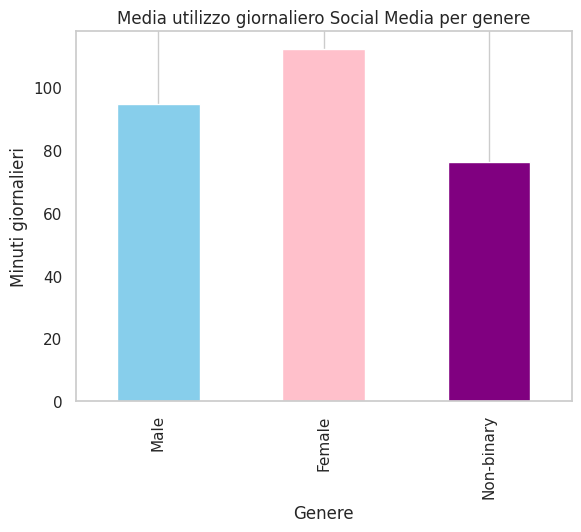

In [65]:
import matplotlib.pyplot as plt

risultato.plot.bar(x='Gender', y='media_utilizzo_giornaliero', legend=False, color=['skyblue', 'pink', 'purple'])
plt.title("Media utilizzo giornaliero Social Media per genere")
plt.ylabel("Minuti giornalieri")
plt.xlabel("Genere")
plt.grid(axis='y')
plt.show()


In [66]:
plt.savefig('grafico_social_media.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [67]:
import os

# Elenca tutti i file presenti nella cartella di input (tipica di Kaggle)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/social-media-usage-and-emotional-well-being/val.csv
/kaggle/input/social-media-usage-and-emotional-well-being/train.csv
/kaggle/input/social-media-usage-and-emotional-well-being/test.csv
/kaggle/input/grafici-social-mental/03.png
/kaggle/input/grafici-social-mental/02.png
/kaggle/input/grafici-social-mental/01.png
/kaggle/input/ultimate/ultimate.xlsx


In [68]:
# Usa il nuovo parametro on_bad_lines per ignorare righe malformate
val_df = pd.read_csv('/kaggle/input/social-media-usage-and-emotional-well-being/val.csv', on_bad_lines='skip')


In [69]:
# Unione dei tre DataFrame
df = pd.concat([train_df, test_df, val_df], ignore_index=True)

# Controlla che sia tutto ok
print("Dimensioni del dataset combinato:", df.shape)
df.head()


Dimensioni del dataset combinato: (1249, 10)


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [70]:
print("Numero totale di righe:", len(df))


Numero totale di righe: 1249


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Per Kaggle, il dataset è solitamente disponibile nella directory '../input/'
# o direttamente con il nome del file se è nella directory corrente
# Prova una di queste opzioni:

# Opzione 1: Se il dataset è nella directory input
try:
    df = pd.read_csv('../input/social-media-and-mental-health/social_media_mental_health.csv')
except:
    # Opzione 2: Se il dataset è nella directory corrente
    try:
        df = pd.read_csv('social_media_mental_health.csv')
    except:
        # Opzione 3: Se è in formato Excel
        try:
            df = pd.read_excel('../input/social-media-and-mental-health/social_media_mental_health.xlsx')
        except:
            print("Non riesco a trovare il file. Controlla il percorso esatto e il formato.")
            
# Verifica i nomi delle colonne per usare quelli corretti
print("Colonne disponibili:", df.columns.tolist())

# Ora identifica le colonne corrette per l'analisi
# Ad esempio, trova le colonne relative all'uso dei social media e alla salute mentale
time_column = [col for col in df.columns if 'time' in col.lower() or 'hour' in col.lower() or 'social media' in col.lower()][0]
mental_health_columns = [col for col in df.columns if any(word in col.lower() for word in ['anxiety', 'depression', 'panic', 'stress', 'mental'])]

print(f"Colonna tempo: {time_column}")
print(f"Colonne salute mentale: {mental_health_columns}")

# Continua con il resto del codice una volta che hai identificato le colonne corrette

Non riesco a trovare il file. Controlla il percorso esatto e il formato.
Colonne disponibili: ['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Dominant_Emotion']
Colonna tempo: Daily_Usage_Time (minutes)
Colonne salute mentale: []


In [72]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Elenca tutti i file nella directory di input
print("File disponibili:")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Prova a caricare il dataset dalla posizione corretta
# Sostituisci questo percorso con uno dei percorsi mostrati sopra
try:
    # Cerca di trovare il file del dataset
    dataset_path = None
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            if filename.endswith('.csv') or filename.endswith('.xlsx') or filename.endswith('.xls'):
                dataset_path = os.path.join(dirname, filename)
                print(f"Tentativo di caricamento del file: {dataset_path}")
                break
        if dataset_path:
            break
    
    # Carica il dataset trovato
    if dataset_path:
        if dataset_path.endswith('.csv'):
            df = pd.read_csv(dataset_path)
        else:
            df = pd.read_excel(dataset_path)
        
        print("Dataset caricato con successo!")
        print("Dimensioni:", df.shape)
        print("Colonne:", df.columns.tolist())
        print("Prime 5 righe:")
        print(df.head())
    else:
        print("Nessun file di dataset trovato.")
        
except Exception as e:
    print(f"Errore nel caricamento del file: {e}")

File disponibili:
/kaggle/input/social-media-usage-and-emotional-well-being/val.csv
/kaggle/input/social-media-usage-and-emotional-well-being/train.csv
/kaggle/input/social-media-usage-and-emotional-well-being/test.csv
/kaggle/input/grafici-social-mental/03.png
/kaggle/input/grafici-social-mental/02.png
/kaggle/input/grafici-social-mental/01.png
/kaggle/input/ultimate/ultimate.xlsx
Tentativo di caricamento del file: /kaggle/input/social-media-usage-and-emotional-well-being/val.csv
Errore nel caricamento del file: Error tokenizing data. C error: Expected 10 fields in line 91, saw 11



In [73]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Percorso al file individuato
file_path = '/kaggle/input/social-media-usage-and-emotional-well-being/train.csv'

# Prova a caricare con opzioni per gestire errori di formato
try:
    # Prima opzione: usa l'opzione error_bad_lines=False (pandas < 1.3.0)
    try:
        df = pd.read_csv(file_path, error_bad_lines=False, warn_bad_lines=True)
    except TypeError:
        # Seconda opzione: usa on_bad_lines='skip' (pandas >= 1.3.0)
        df = pd.read_csv(file_path, on_bad_lines='skip')
    
    print("Dataset caricato con successo!")
    print("Dimensioni:", df.shape)
    print("Colonne:", df.columns.tolist())
    print("Prime 5 righe:")
    print(df.head())
    
    # Verifica se ci sono colonne relative all'uso dei social media e alla salute mentale
    print("\nColonne rilevanti per l'analisi:")
    for col in df.columns:
        if any(term in col.lower() for term in ['social', 'media', 'time', 'hour', 'mental', 'health', 
                                               'anxiety', 'depression', 'stress', 'emotion']):
            print(f"- {col}")
    
except Exception as e:
    print(f"Errore nel caricamento del file: {e}")

Dataset caricato con successo!
Dimensioni: (1001, 10)
Colonne: ['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Dominant_Emotion']
Prime 5 righe:
  User_ID Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0       1  25      Female  Instagram                       120.0   
1       2  30        Male    Twitter                        90.0   
2       3  22  Non-binary   Facebook                        60.0   
3       4  28      Female  Instagram                       200.0   
4       5  33        Male   LinkedIn                        45.0   

   Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0            3.0                    45.0                       10.0   
1            5.0                    20.0                       25.0   
2            2.0                    15.0                        5.0   
3            8.0                   100.0 

In [74]:
import numpy as np
import pandas as pd

# Supponendo che 'df' sia il tuo DataFrame:
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()
# oppure, se preferisci sostituire i NaN con uno 0:
df_clean = df.replace([np.inf, -np.inf], np.nan).fillna(0)


In [75]:
import numpy as np
import pandas as pd

# Sostituisci gli infiniti con NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Per ogni colonna, se è di tipo categorico, aggiungi la categoria 0
for col in df.columns:
    if isinstance(df[col].dtype, pd.CategoricalDtype):
        df[col] = df[col].cat.add_categories(0)

# Ora sostituisci i NaN con 0
df_clean = df.fillna(0)


In [76]:
print(df_clean.head())


  User_ID Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0       1  25      Female  Instagram                       120.0   
1       2  30        Male    Twitter                        90.0   
2       3  22  Non-binary   Facebook                        60.0   
3       4  28      Female  Instagram                       200.0   
4       5  33        Male   LinkedIn                        45.0   

   Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0            3.0                    45.0                       10.0   
1            5.0                    20.0                       25.0   
2            2.0                    15.0                        5.0   
3            8.0                   100.0                       30.0   
4            1.0                     5.0                        2.0   

   Messages_Sent_Per_Day Dominant_Emotion  
0                   12.0        Happiness  
1                   30.0            Anger  
2                   20.0        

<Figure size 1000x600 with 0 Axes>

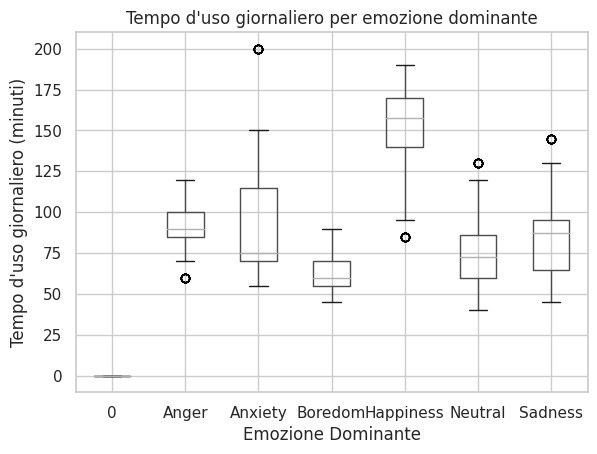

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_clean.boxplot(column='Daily_Usage_Time (minutes)', by='Dominant_Emotion')
plt.title("Tempo d'uso giornaliero per emozione dominante")
plt.suptitle('')  # Rimuove il titolo automatico di default
plt.xlabel("Emozione Dominante")
plt.ylabel("Tempo d'uso giornaliero (minuti)")
plt.show()


  Dominant_Emotion  Daily_Usage_Time (minutes)
0                0                    0.000000
1            Anger                   90.000000
2          Anxiety                   95.588235
3          Boredom                   63.928571
4        Happiness                  150.500000
5          Neutral                   77.750000
6          Sadness                   83.750000


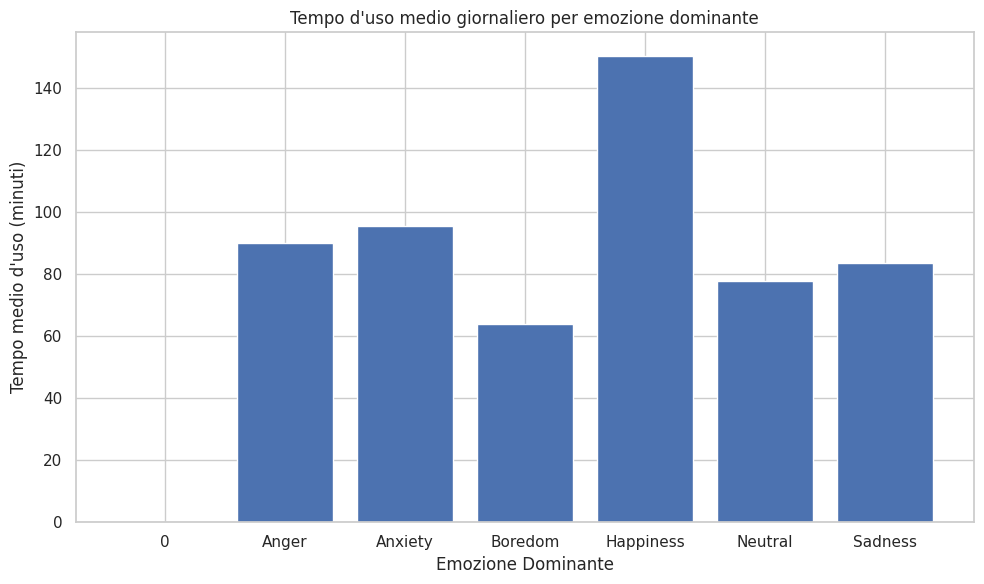

In [78]:
import matplotlib.pyplot as plt

# Calcola la media del tempo di utilizzo per ogni emozione
mean_usage = df_clean.groupby('Dominant_Emotion')['Daily_Usage_Time (minutes)'].mean().reset_index()
# Forza le etichette in stringa (per sicurezza)
mean_usage['Dominant_Emotion'] = mean_usage['Dominant_Emotion'].astype(str)

# Stampa il dataframe per verificare i valori
print(mean_usage)

plt.figure(figsize=(10, 6))
plt.bar(mean_usage['Dominant_Emotion'], mean_usage['Daily_Usage_Time (minutes)'])
plt.title("Tempo d'uso medio giornaliero per emozione dominante")
plt.xlabel("Emozione Dominante")
plt.ylabel("Tempo medio d'uso (minuti)")
plt.tight_layout()
plt.show()


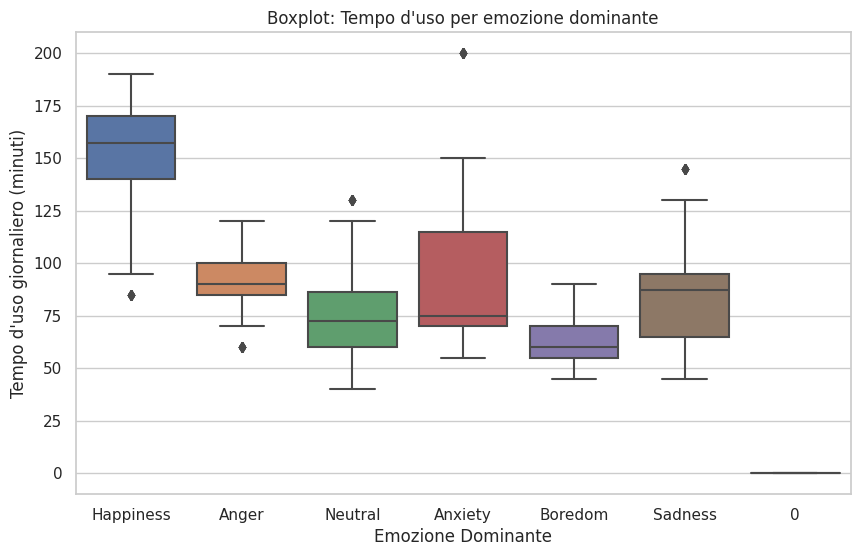

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dominant_Emotion', y='Daily_Usage_Time (minutes)', data=df_clean)
plt.title("Boxplot: Tempo d'uso per emozione dominante")
plt.xlabel("Emozione Dominante")
plt.ylabel("Tempo d'uso giornaliero (minuti)")
plt.show()


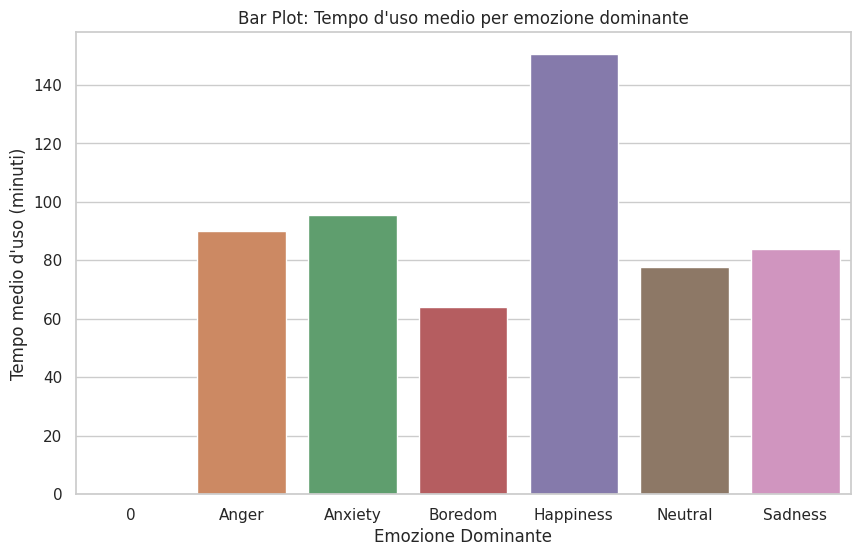

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola la media per ciascuna emozione
mean_usage = df_clean.groupby('Dominant_Emotion')['Daily_Usage_Time (minutes)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Dominant_Emotion', y='Daily_Usage_Time (minutes)', data=mean_usage)
plt.title("Bar Plot: Tempo d'uso medio per emozione dominante")
plt.xlabel("Emozione Dominante")
plt.ylabel("Tempo medio d'uso (minuti)")
plt.show()


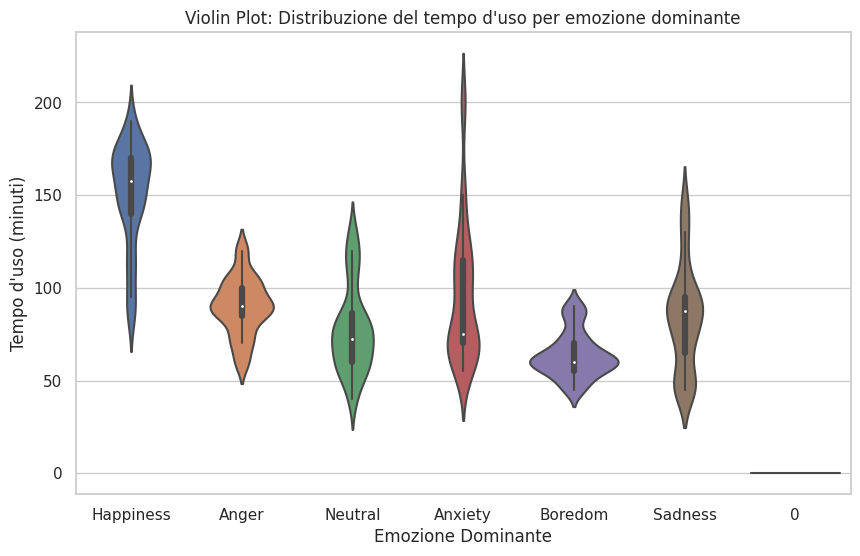

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='Dominant_Emotion', y='Daily_Usage_Time (minutes)', data=df_clean)
plt.title("Violin Plot: Distribuzione del tempo d'uso per emozione dominante")
plt.xlabel("Emozione Dominante")
plt.ylabel("Tempo d'uso (minuti)")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


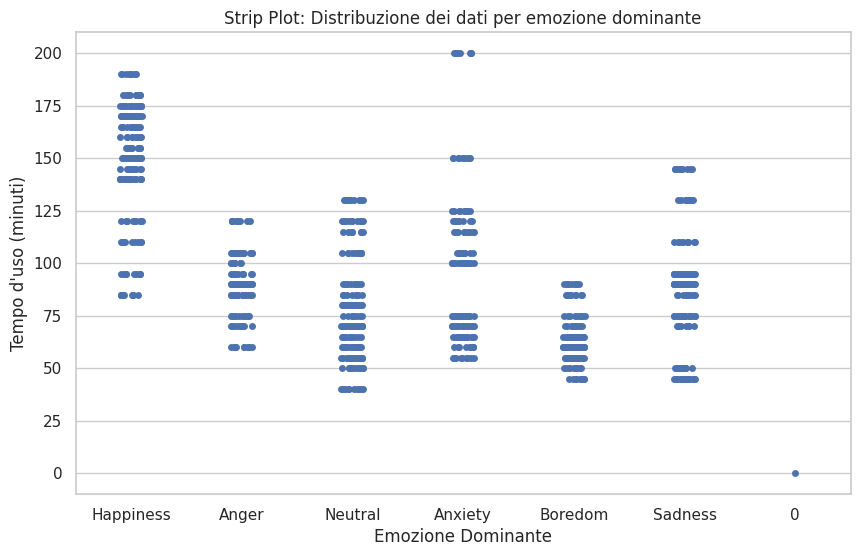

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.stripplot(x='Dominant_Emotion', y='Daily_Usage_Time (minutes)', data=df_clean, jitter=True)
plt.title("Strip Plot: Distribuzione dei dati per emozione dominante")
plt.xlabel("Emozione Dominante")
plt.ylabel("Tempo d'uso (minuti)")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the mar

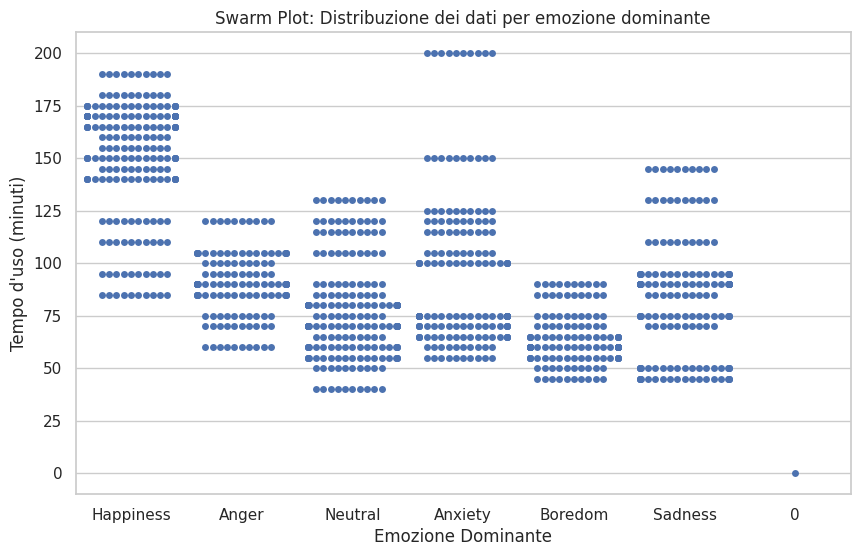

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Dominant_Emotion', y='Daily_Usage_Time (minutes)', data=df_clean)
plt.title("Swarm Plot: Distribuzione dei dati per emozione dominante")
plt.xlabel("Emozione Dominante")
plt.ylabel("Tempo d'uso (minuti)")
plt.show()


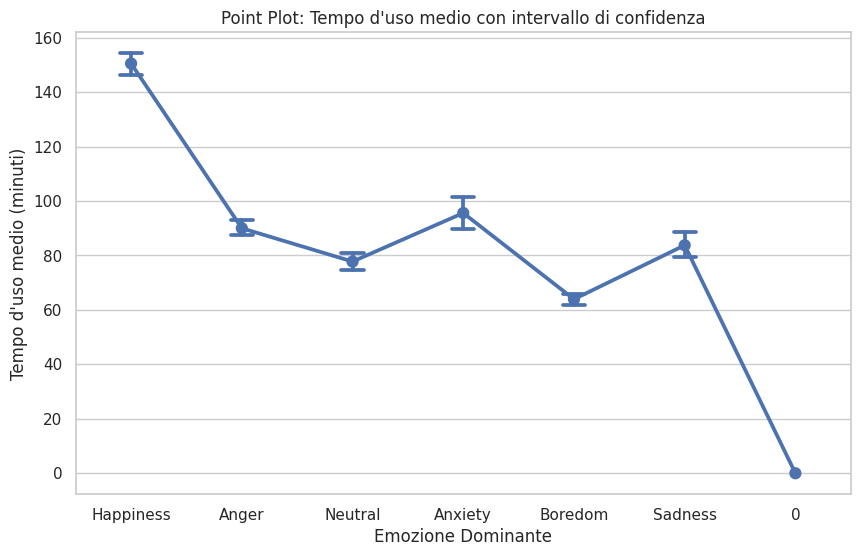

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.pointplot(x='Dominant_Emotion', y='Daily_Usage_Time (minutes)', data=df_clean, capsize=0.2)
plt.title("Point Plot: Tempo d'uso medio con intervallo di confidenza")
plt.xlabel("Emozione Dominante")
plt.ylabel("Tempo d'uso medio (minuti)")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

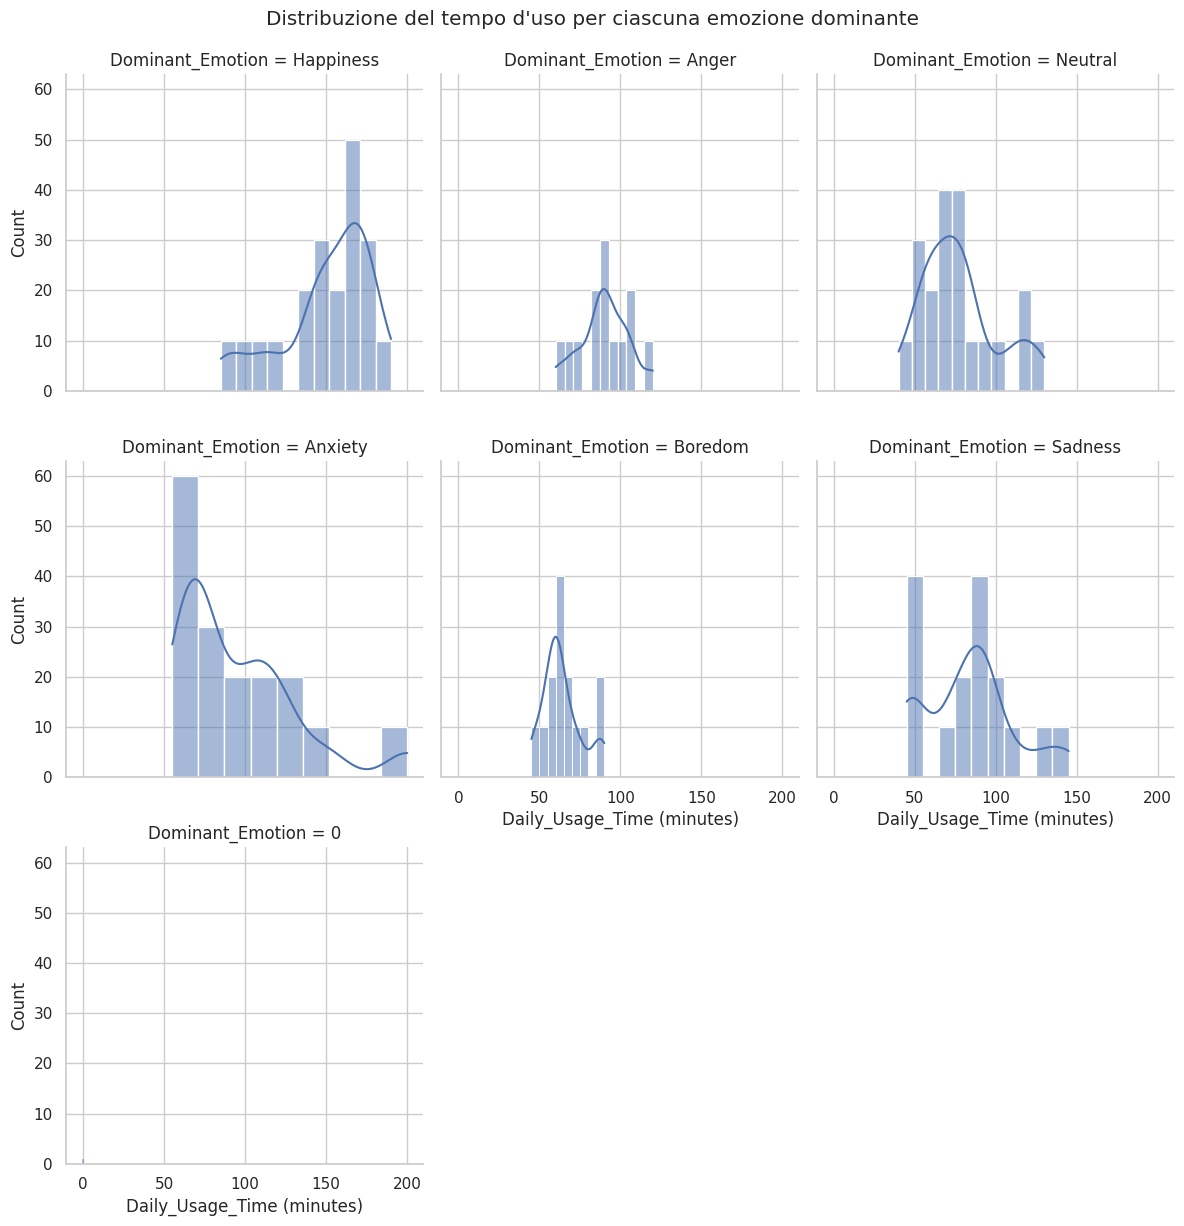

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(df_clean, col="Dominant_Emotion", col_wrap=3, height=4)
g.map(sns.histplot, "Daily_Usage_Time (minutes)", kde=True)
g.fig.suptitle("Distribuzione del tempo d'uso per ciascuna emozione dominante", y=1.02)
plt.show()


In [86]:
import pandas as pd
import numpy as np

# Carica tutti e 3 i file
train_df = pd.read_csv('/kaggle/input/social-media-usage-and-emotional-well-being/train.csv')
test_df = pd.read_csv('/kaggle/input/social-media-usage-and-emotional-well-being/test.csv')
val_df = pd.read_csv('/kaggle/input/social-media-usage-and-emotional-well-being/val.csv', on_bad_lines='skip')

# Unisci i dataset
df = pd.concat([train_df, test_df, val_df], ignore_index=True)

# Pulisci i dati
df = df.replace([np.inf, -np.inf], np.nan)

# Gestione delle colonne categoriche
for col in df.columns:
    if isinstance(df[col].dtype, pd.CategoricalDtype):
        df[col] = df[col].cat.add_categories(0)

# Riempie i NaN con 0 e salva in df_clean
df_clean = df.fillna(0)

# Visualizza le prime righe
df_clean.head()


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


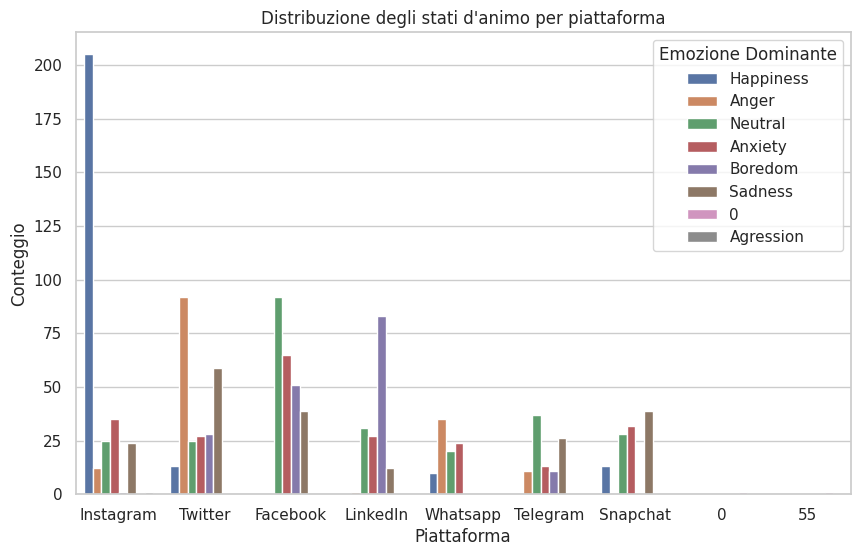

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x="Platform", hue="Dominant_Emotion")
plt.title("Distribuzione degli stati d'animo per piattaforma")
plt.xlabel("Piattaforma")
plt.ylabel("Conteggio")
plt.legend(title="Emozione Dominante")
plt.show()


## Interpretazione del grafico: Emozioni e piattaforme social

Il grafico mostra come il tipo di social network abbia un impatto significativo sulle emozioni dominanti espresse dagli utenti.

In particolare, spicca il caso di **Instagram**, che genera con maggiore frequenza una sensazione di **felicità**. Questo può essere attribuito al fatto che Instagram è una piattaforma poco relazionale e fortemente visiva: l’utente viene continuamente esposto a contenuti altamente stimolanti e accattivanti (bellezza, lusso, stile di vita ideale) che attivano il **sistema limbico**, rilasciando **dopamina** e producendo una sensazione momentanea di benessere. Tuttavia, questo effetto dopaminico rende Instagram anche potenzialmente più **dipendente**: più l’utente prova piacere, più sarà portato ad aprire il social.

Al contrario, **Twitter (X)** mostra una prevalenza di emozioni negative come **rabbia**. Essendo un social basato sullo scambio continuo di opinioni e commenti, diventa terreno fertile per discussioni, scontri verbali e attacchi personali. Questo lo rende un ambiente potenzialmente ostile per l’ego dell’utente.

**Facebook** si posiziona su una linea più **neutrale**: il ritmo di interazione è più lento e spesso si limita all’osservazione dei profili, che risultano meno idealizzati rispetto ad altre piattaforme.

**LinkedIn** è percepito come **noioso**, poiché è utilizzato prevalentemente in ambito professionale. È più uno strumento di lavoro che un social a scopo ricreativo.

**WhatsApp** presenta un dato interessante: è associato a emozioni di **rabbia**. Trattandosi di uno strumento di comunicazione diretta con partner, familiari e persone vicine, è anche luogo di tensioni, conflitti e incomprensioni. Questo dato potrebbe riflettere dinamiche relazionali personali (rotture, litigi, discussioni intime).

**Telegram** è collegato a emozioni prevalentemente **neutre**, in quanto viene usato principalmente per lo scambio di informazioni, link, e aggiornamenti tramite canali tematici.

Infine, **Snapchat** mostra un'associazione con la **tristezza**, ma va interpretata con cautela poiché la piattaforma risulta poco utilizzata nel campione considerato.



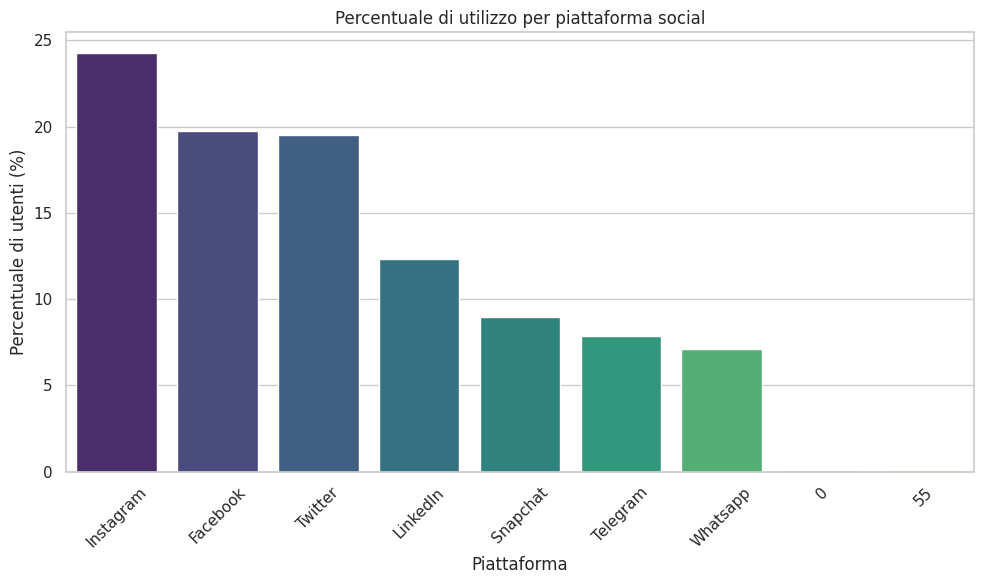

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola la percentuale d'uso per ogni piattaforma
platform_counts = df_clean['Platform'].value_counts(normalize=True) * 100
platform_counts = platform_counts.reset_index()
platform_counts.columns = ['Platform', 'Percentuale']

# Grafico
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_counts, x='Platform', y='Percentuale', palette='viridis')
plt.title("Percentuale di utilizzo per piattaforma social")
plt.xlabel("Piattaforma")
plt.ylabel("Percentuale di utenti (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Analisi della percentuale di utilizzo per piattaforma social

Il grafico evidenzia chiaramente la distribuzione percentuale di utilizzo delle diverse piattaforme social analizzate. Si nota una correlazione interessante tra **la diffusione di una piattaforma e il tipo di emozioni che genera negli utenti**.

In particolare, **Instagram** è nettamente la più utilizzata: questo dato è coerente con il fatto che è anche il social associato a emozioni più **positive** (prevalentemente felicità). La natura visiva e stimolante della piattaforma contribuisce a renderla molto attrattiva.

**Facebook** si colloca al secondo posto in termini di utilizzo. Anche se genera emozioni prevalentemente **neutre**, non sembra causare malessere significativo, e la sua presenza consolidata nel tempo probabilmente gioca un ruolo importante nella sua diffusione.

**Twitter (X)** si piazza al terzo posto, nonostante la predominanza di emozioni **negative** (come rabbia e ansia) tra i suoi utenti. Questo dato suggerisce che il **bisogno di interazione e opinione** possa prevalere sul disagio che l'esperienza d'uso genera.

Interessante anche il caso di **LinkedIn**, che ha una percentuale di utilizzo sorprendentemente alta rispetto alla percezione comune. Questo può essere spiegato con la sua **utilità in ambito professionale**, specie in un campione composto da persone in età adulta.

Seguono **Snapchat**, **Telegram** e **WhatsApp**.  
- **Telegram** sembra essere utilizzato quasi esclusivamente per lo scambio di informazioni, e quindi genera un'esperienza prevalentemente neutra.
- **WhatsApp** viene usato per comunicazioni dirette con amici, partner e colleghi, ma il suo utilizzo è probabilmente **limitato al tempo strettamente necessario** alla conversazione, rendendolo meno presente nelle abitudini prolungate.

Nel complesso, il grafico suggerisce che l’**intensità emotiva** generata da un social può influenzare la sua **diffusione e popolarità**, ma anche che **funzionalità e utilità percepita** restano fattori chiave nell’uso quotidiano.


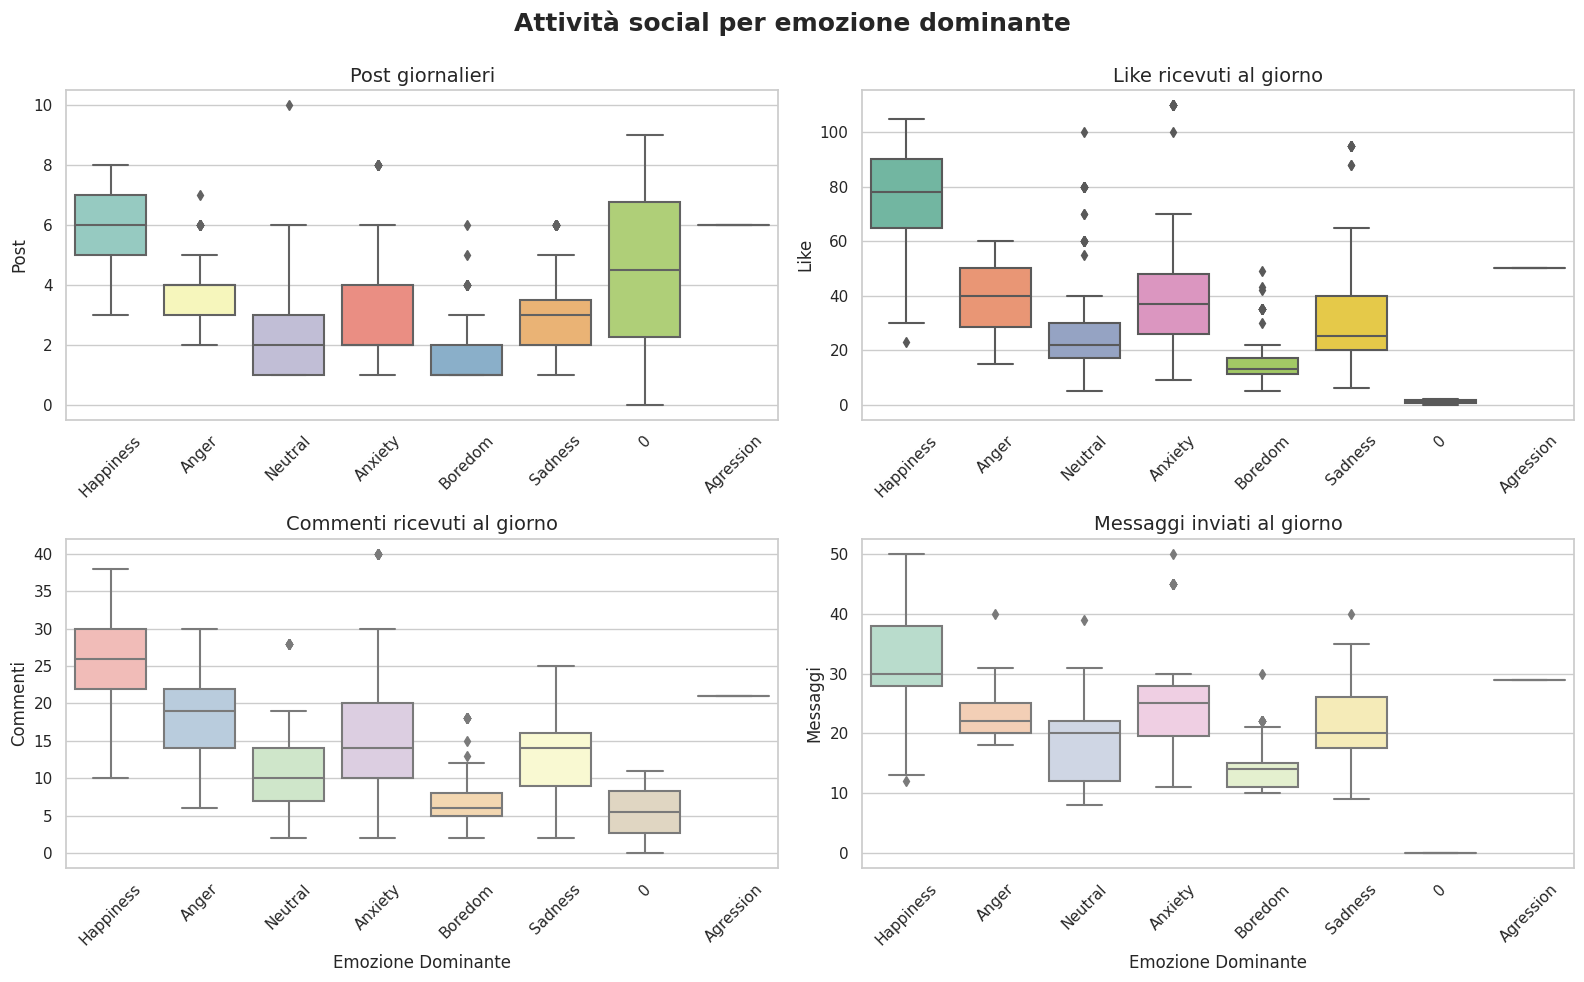

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Forza i dati a essere numerici
cols = ['Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']
df_clean[cols] = df_clean[cols].apply(pd.to_numeric, errors='coerce')

# Set stile
sns.set(style="whitegrid")

# Crea figura e assi
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Attività social per emozione dominante", fontsize=18, fontweight='bold')

# Boxplot 1: Post giornalieri
sns.boxplot(data=df_clean, x='Dominant_Emotion', y='Posts_Per_Day', palette="Set3", ax=axs[0, 0])
axs[0, 0].set_title('Post giornalieri', fontsize=14)
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Post')

# Boxplot 2: Like ricevuti
sns.boxplot(data=df_clean, x='Dominant_Emotion', y='Likes_Received_Per_Day', palette="Set2", ax=axs[0, 1])
axs[0, 1].set_title('Like ricevuti al giorno', fontsize=14)
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('Like')

# Boxplot 3: Commenti ricevuti
sns.boxplot(data=df_clean, x='Dominant_Emotion', y='Comments_Received_Per_Day', palette="Pastel1", ax=axs[1, 0])
axs[1, 0].set_title('Commenti ricevuti al giorno', fontsize=14)
axs[1, 0].set_xlabel('Emozione Dominante')
axs[1, 0].set_ylabel('Commenti')

# Boxplot 4: Messaggi inviati
sns.boxplot(data=df_clean, x='Dominant_Emotion', y='Messages_Sent_Per_Day', palette="Pastel2", ax=axs[1, 1])
axs[1, 1].set_title('Messaggi inviati al giorno', fontsize=14)
axs[1, 1].set_xlabel('Emozione Dominante')
axs[1, 1].set_ylabel('Messaggi')

# Migliora leggibilità etichette
for ax in axs.flat:
    ax.tick_params(axis='x', rotation=45)

# Layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


## Attività social e emozioni: panoramica generale

I quattro grafici sopra riportati offrono una visione d’insieme dell’attività social suddivisa per emozione dominante.  
Vengono analizzate quattro dimensioni comportamentali: **post giornalieri**, **like ricevuti**, **commenti ricevuti** e **messaggi inviati**.

Questi boxplot sono utili per identificare:
- La **distribuzione** dei valori (min, max, mediana)
- La presenza di **outlier**
- La **variabilità** del comportamento per ogni emozione

Tuttavia, trattandosi di dati aggregati, **non tengono conto del numero di utenti per ciascuna emozione**.  
In altre parole, mostrano quanto si posta o si riceve **in totale**, ma **non ci dicono se un utente felice riceve più interazioni di uno triste**, in media.

Per rispondere a questa domanda abbiamo creato delle **analisi mirate sui valori medi per utente**, presentate nei grafici successivi.  
Ed è proprio lì che iniziano a emergere **dettagli interessanti e inaspettati** sul ruolo delle emozioni nelle dinamiche social.


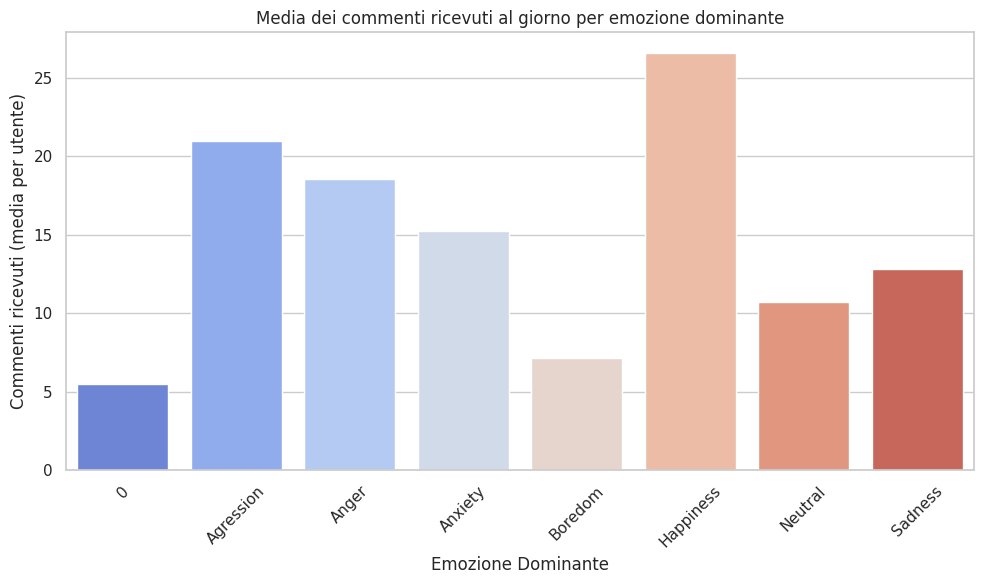

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolo della media dei commenti ricevuti per ciascuna emozione
commenti_media = df_clean.groupby('Dominant_Emotion')['Comments_Received_Per_Day'].mean().reset_index()

# Grafico
plt.figure(figsize=(10, 6))
sns.barplot(data=commenti_media, x='Dominant_Emotion', y='Comments_Received_Per_Day', palette="coolwarm")
plt.title("Media dei commenti ricevuti al giorno per emozione dominante")
plt.xlabel("Emozione Dominante")
plt.ylabel("Commenti ricevuti (media per utente)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Commenti ricevuti: analisi della media per emozione dominante

Il grafico mostra la media dei commenti ricevuti giornalmente per utente, in base all'emozione dominante. Questo tipo di analisi è particolarmente utile per valutare se alcune emozioni ricevono più interazioni **perché sono più rappresentate nel dataset**, oppure se c'è una **tendenza reale** a ricevere più o meno commenti in base allo stato emotivo.

In particolare, emerge che gli utenti con emozione dominante **Happiness** ricevono **la media più alta di commenti**, anche una volta normalizzati per utente. Questo rafforza l'idea che la positività venga premiata nei contesti social, sia per empatia che per reazione a contenuti piacevoli.

Tuttavia, l’emozione **Anger** mostra una media comunque significativa: gli utenti arrabbiati ricevono **più commenti rispetto alla media generale**, anche se meno rispetto ai felici. Ciò potrebbe indicare che contenuti polemici o provocatori tendano a generare risposte, anche se non sempre costruttive.

Le emozioni **Neutral**, **Boredom** e **Sadness** si trovano su livelli più bassi, suggerendo una minore capacità di stimolare conversazioni o engagement da parte degli utenti che le provano.

In sintesi, **la felicità è ancora una volta correlata al maggior livello di coinvolgimento**, ma anche le emozioni intense come la rabbia giocano un ruolo rilevante nella dinamica dei commenti.


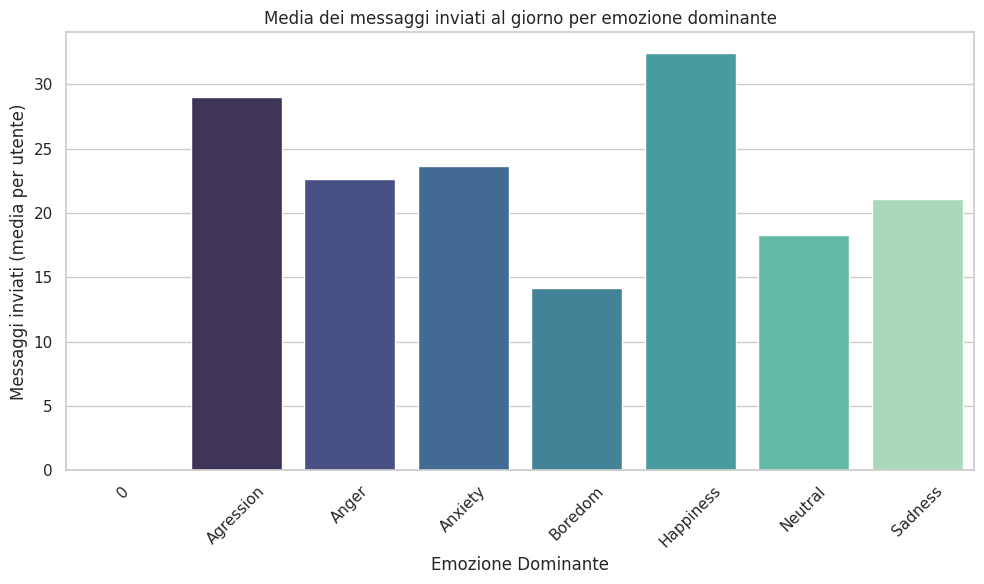

In [91]:
# Calcola la media dei messaggi inviati per emozione
messaggi_media = df_clean.groupby('Dominant_Emotion')['Messages_Sent_Per_Day'].mean().reset_index()

# Grafico
plt.figure(figsize=(10, 6))
sns.barplot(data=messaggi_media, x='Dominant_Emotion', y='Messages_Sent_Per_Day', palette="mako")
plt.title("Media dei messaggi inviati al giorno per emozione dominante")
plt.xlabel("Emozione Dominante")
plt.ylabel("Messaggi inviati (media per utente)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Analisi dei messaggi inviati per emozione dominante

Questo grafico evidenzia la media dei messaggi inviati ogni giorno da parte degli utenti, suddivisi per emozione dominante. L'obiettivo è capire **quanto il bisogno di comunicazione sia legato al vissuto emotivo**.

Come atteso, gli utenti associati a **Happiness** risultano i più attivi: la positività sembra spingere alla socialità, allo scambio e alla condivisione. Tuttavia, il dato davvero interessante è che **le emozioni negative non si discostano molto**.

Chi prova **Anger**, **Aggression** o **Anxiety** invia un numero medio di messaggi sorprendentemente alto. Questo suggerisce che **la comunicazione online può essere anche reattiva o impulsiva**, alimentata da frustrazione, tensione o confronto. In questi casi, il social sembra diventare un **canale di sfogo** o di gestione emotiva.

Al contrario, utenti con emozioni come **Boredom** e **Neutral** risultano meno coinvolti nelle conversazioni private: probabilmente hanno un uso più passivo della rete sociale.

Nel complesso, l’analisi mostra che **la quantità di messaggi non è sempre indice di benessere**: anche emozioni negative possono portare a un’intensa attività comunicativa, seppur con finalità differenti.


## Considerazioni sul campione analizzato

Durante l’analisi è emersa la curiosità di esplorare una possibile correlazione tra **età ed emozioni dominanti**. Tuttavia, osservando i dati, risulta evidente che il campione preso in esame è composto **esclusivamente da utenti adulti**.

La maggior parte dei soggetti presenti ha infatti un'età superiore ai 25 anni, età in cui – secondo la letteratura neuroscientifica – **il cervello ha completato il suo sviluppo**, in particolare nelle aree deputate al controllo emotivo e all’autoregolazione (come la corteccia prefrontale).

Questo rende meno rilevante l'analisi dell’emotività legata all’età, in quanto **gli adulti tendono ad avere una maggiore consapevolezza e gestione delle emozioni** rispetto agli adolescenti, che sono invece **la fascia più vulnerabile e impulsiva** nel contesto digitale.

Inoltre, la presenza di dati riferiti a **minori** è estremamente limitata o assente in molti dataset pubblici per motivi etici e legali legati alla privacy.

Pertanto, è bene sottolineare che **le conclusioni tratte da questo studio rappresentano il comportamento emotivo e sociale di una popolazione adulta**, e non sono generalizzabili alle fasce giovanili, che richiederebbero un'analisi a parte con dati dedicati.


In [92]:
import pandas as pd

# Sostituisci il percorso con quello corretto se usi Colab o hai caricato il file
df_fb = pd.read_excel('/kaggle/input/ultimate/ultimate.xlsx')
df_fb.head()


,Timestamp,"1. Do you have a social media account? (e.g., Facebook, Twitter, etc.)",2. Which social media account do you use usually?,3. Which device do you usually use to connect social media?,4. Which type of internet connection do you use?,5. How long have you been using a social media account?,6. How frequently do you post (upload status or add photos/videos) on social media?,7. How much time do you spend daily in social media?,8. When do you usually use social media?,9. How many friends do you have on social media?,...,"10. In last 30 days, How many times, I cough or snore loudly?","11. In last 30 days, How many times, I feel too cold?","12. In last 30 days, How many times, I feel too hot?","13. In last 30 days, How many times, I saw bad dreams?","14. In last 30 days, How many times, I have pain during sleep?","15. In last 30 days, How many times, I having trouble sleeping for any other reason?","16. In last 30 days, In last month, have you take medicines for sleep?","17. In last month, how many times you cannot sleep due to any program or other important case?","18. In last month, how many times you face problems to maintain program or other important case?","19. During the past month, how would you rate your sleep quality overall?"
0,2021-02-20 21:56:49.755,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,Less than 1 per day,1-3 hours,Frequently at anytime,Less than 500,...,Not during last month,Less then once a week,Not during last month,Not during last month,Not during last month,Less then once a week,Not during last month,Less then once a week,Less then once a week,Farely good
1,2021-02-20 23:32:52.030,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,3-5 per day,More than 5 hours,Frequently at anytime,500-2000,...,Less then once a week,Less then once a week,Three or more in week,Less then once a week,Not during last month,Not during last month,Less then once a week,Less then once a week,Less then once a week,Very bad
2,2021-02-16 21:03:59.071,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,Less than 1 per day,3-5 hours,Night to late night,Less than 500,...,Not during last month,Not during last month,Less then once a week,Less then once a week,Three or more in week,Three or more in week,Not during last month,Three or more in week,Once or twice a week,Very bad
3,2021-03-01 10:03:23.049,Yes,Twitter,Mobile Phone,Mobile data,Less than 2-year,Less than 1 per day,3-5 hours,Frequently at anytime,500-2000,...,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Farely good
4,2021-02-27 19:27:54.278,Yes,Twitter,Mobile Phone,Broadband (Wi-Fi),Less than 2-year,More than 5 per day,More than 5 hours,Night to late night,2000-4000,...,Not during last month,Not during last month,Not during last month,Not during last month,Less then once a week,Less then once a week,Less then once a week,Less then once a week,Less then once a week,Farely good


In [93]:
import pandas as pd

df_fb = pd.read_excel('/kaggle/input/ultimate/ultimate.xlsx')
df_fb.head()


,Timestamp,"1. Do you have a social media account? (e.g., Facebook, Twitter, etc.)",2. Which social media account do you use usually?,3. Which device do you usually use to connect social media?,4. Which type of internet connection do you use?,5. How long have you been using a social media account?,6. How frequently do you post (upload status or add photos/videos) on social media?,7. How much time do you spend daily in social media?,8. When do you usually use social media?,9. How many friends do you have on social media?,...,"10. In last 30 days, How many times, I cough or snore loudly?","11. In last 30 days, How many times, I feel too cold?","12. In last 30 days, How many times, I feel too hot?","13. In last 30 days, How many times, I saw bad dreams?","14. In last 30 days, How many times, I have pain during sleep?","15. In last 30 days, How many times, I having trouble sleeping for any other reason?","16. In last 30 days, In last month, have you take medicines for sleep?","17. In last month, how many times you cannot sleep due to any program or other important case?","18. In last month, how many times you face problems to maintain program or other important case?","19. During the past month, how would you rate your sleep quality overall?"
0,2021-02-20 21:56:49.755,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,Less than 1 per day,1-3 hours,Frequently at anytime,Less than 500,...,Not during last month,Less then once a week,Not during last month,Not during last month,Not during last month,Less then once a week,Not during last month,Less then once a week,Less then once a week,Farely good
1,2021-02-20 23:32:52.030,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,3-5 per day,More than 5 hours,Frequently at anytime,500-2000,...,Less then once a week,Less then once a week,Three or more in week,Less then once a week,Not during last month,Not during last month,Less then once a week,Less then once a week,Less then once a week,Very bad
2,2021-02-16 21:03:59.071,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,Less than 1 per day,3-5 hours,Night to late night,Less than 500,...,Not during last month,Not during last month,Less then once a week,Less then once a week,Three or more in week,Three or more in week,Not during last month,Three or more in week,Once or twice a week,Very bad
3,2021-03-01 10:03:23.049,Yes,Twitter,Mobile Phone,Mobile data,Less than 2-year,Less than 1 per day,3-5 hours,Frequently at anytime,500-2000,...,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Farely good
4,2021-02-27 19:27:54.278,Yes,Twitter,Mobile Phone,Broadband (Wi-Fi),Less than 2-year,More than 5 per day,More than 5 hours,Night to late night,2000-4000,...,Not during last month,Not during last month,Not during last month,Not during last month,Less then once a week,Less then once a week,Less then once a week,Less then once a week,Less then once a week,Farely good


In [94]:
df_fb.columns.tolist()


['Timestamp',
 '1. Do you have a social media account? (e.g., Facebook, Twitter, etc.)',
 '2. Which social media account do you use usually?',
 '3. Which device do you usually use to connect social media?',
 '4. Which type of internet connection do you use?',
 '5. How long have you been using a social media account?',
 '6. How frequently do you post (upload status or add photos/videos) on social media? ',
 '7. How much time do you spend daily in social media?',
 '8. When do you usually use social media?',
 '9. How many friends do you have on social media?',
 '10. How many friends do you know personally in social media? ',
 '11. How many groups you are tagged in social media?',
 '12. What is your main purpose for using social media (e.g. Facebook)?',
 '13. What contents do you mainly look for in your social media news feed?',
 '14.Do you believe social media is a good thing?',
 '15. When you see something in social media, do you instantly believe it?',
 '16. Have you ever experienced pe

In [95]:
len(df_fb)


791

In [96]:
df_fb['7. How much time do you spend daily in social media?'].value_counts()


7. How much time do you spend daily in social media?
1-3 hours            291
3-5 hours            204
More than 5 hours    176
Less than 1 hour     120
Name: count, dtype: int64

In [97]:
df_fb['7. How much time do you spend daily in social media?'].describe()


count           791
unique            4
top       1-3 hours
freq            291
Name: 7. How much time do you spend daily in social media?, dtype: object

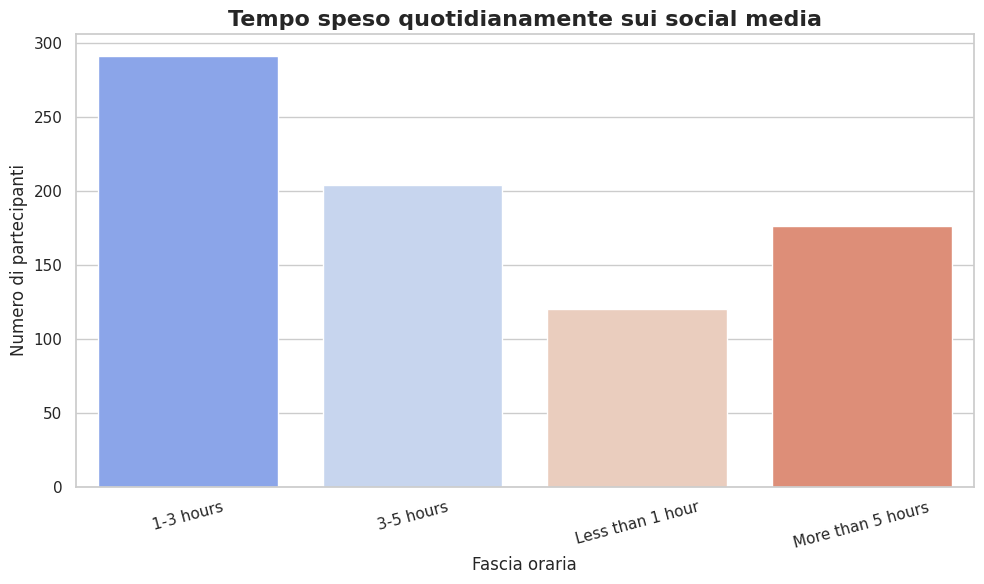

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Impostiamo lo stile
sns.set(style="whitegrid")

# Conta le risposte
tempo_social_counts = df_fb['7. How much time do you spend daily in social media?'].value_counts().sort_index()

# Grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x=tempo_social_counts.index, y=tempo_social_counts.values, palette="coolwarm")

# Etichette
plt.title("Tempo speso quotidianamente sui social media", fontsize=16, fontweight='bold')
plt.xlabel("Fascia oraria", fontsize=12)
plt.ylabel("Numero di partecipanti", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Tempo medio giornaliero stimato: 3.18 ore


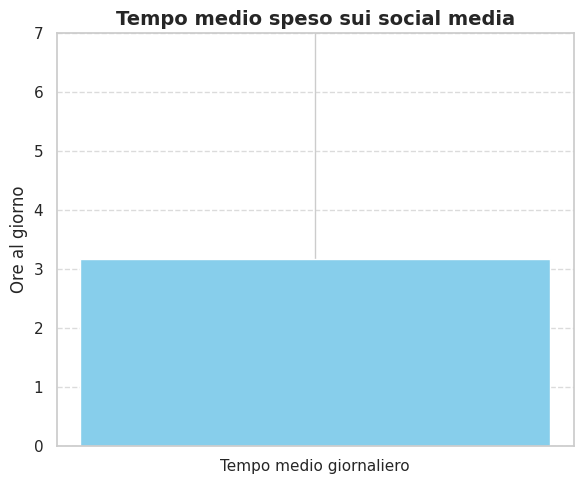

In [99]:
# Mappa dei valori stimati in ore
mappa_valori = {
    'Less than 1 hour': 0.5,
    '1-3 hours': 2,
    '3-5 hours': 4,
    'More than 5 hours': 6
}

# Applichiamo la mappa alla colonna
df_fb['ore_stimate'] = df_fb['7. How much time do you spend daily in social media?'].map(mappa_valori)

# Calcolo della media complessiva
media_ore = df_fb['ore_stimate'].mean()
print(f"Tempo medio giornaliero stimato: {media_ore:.2f} ore")

# Grafico a barre singola
plt.figure(figsize=(6, 5))
plt.bar(['Tempo medio giornaliero'], [media_ore], color='skyblue')
plt.title("Tempo medio speso sui social media", fontsize=14, fontweight='bold')
plt.ylabel("Ore al giorno")
plt.ylim(0, 7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


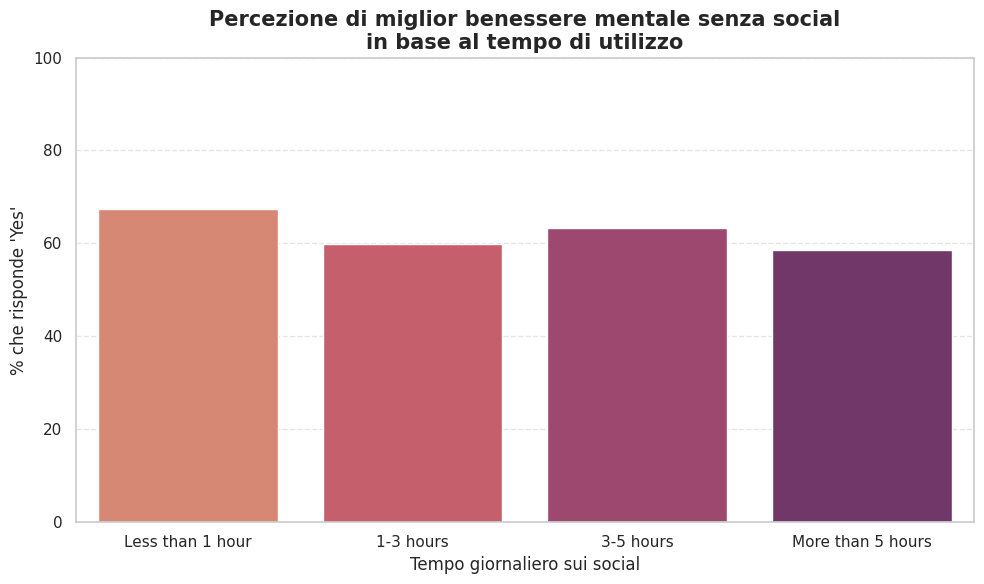

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colonne utili
tempo_col = '7. How much time do you spend daily in social media?'
benessere_col = '19. Do you think, your mental wellbeing would be better if you do not use social media?'

# Filtra i valori validi
df_filtrato = df_fb[[tempo_col, benessere_col]].dropna()

# Raggruppa le risposte per fascia oraria
conteggi = df_filtrato.groupby([tempo_col, benessere_col]).size().unstack(fill_value=0)

# Calcola la percentuale di "Yes" per ogni fascia
conteggi['% Yes'] = conteggi.get('Yes', 0) / conteggi.sum(axis=1) * 100

# Ordina le fasce
ordine_fasce = ['Less than 1 hour', '1-3 hours', '3-5 hours', 'More than 5 hours']
conteggi = conteggi.reindex(ordine_fasce)

# Grafico
plt.figure(figsize=(10, 6))
sns.barplot(x=conteggi.index, y=conteggi['% Yes'], palette="flare")
plt.title("Percezione di miglior benessere mentale senza social\nin base al tempo di utilizzo", fontsize=15, fontweight='bold')
plt.xlabel("Tempo giornaliero sui social", fontsize=12)
plt.ylabel("% che risponde 'Yes'", fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [101]:
df_fb['19. Do you think, your mental wellbeing would be better if you do not use social media?'].value_counts()


19. Do you think, your mental wellbeing would be better if you do not use social media?
Yes    487
No     304
Name: count, dtype: int64

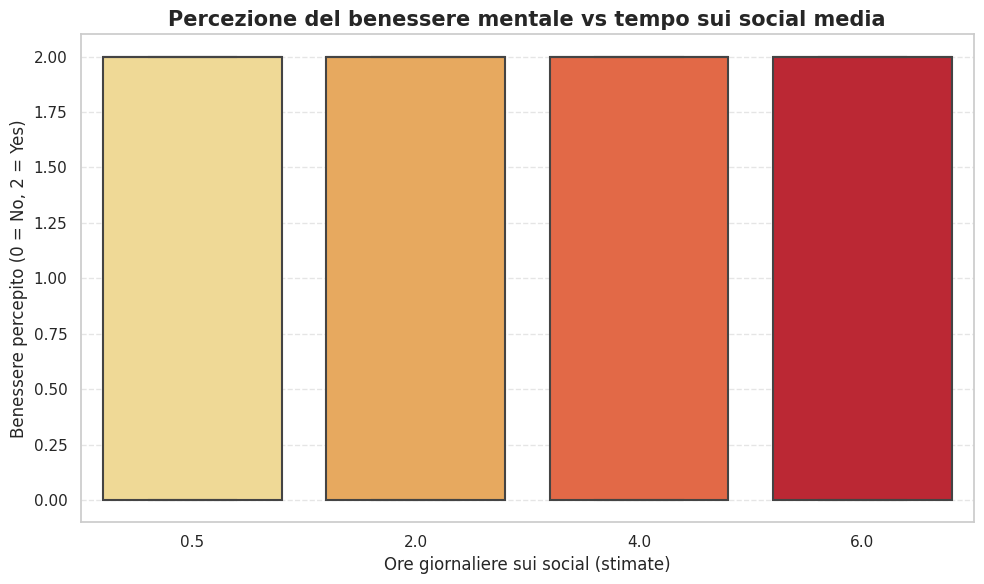

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mappa delle risposte su benessere percepito
mappa_benessere = {
    'Yes': 2,
    'No': 0
}
df_fb['benessere_num'] = df_fb['19. Do you think, your mental wellbeing would be better if you do not use social media?'].map(mappa_benessere)

# Mappa delle ore stimate
mappa_ore = {
    'Less than 1 hour': 0.5,
    '1-3 hours': 2,
    '3-5 hours': 4,
    'More than 5 hours': 6
}
df_fb['ore_stimate'] = df_fb['7. How much time do you spend daily in social media?'].map(mappa_ore)

# Rimuoviamo valori mancanti
df_plot = df_fb[['ore_stimate', 'benessere_num']].dropna()

# Grafico
plt.figure(figsize=(10, 6))
sns.boxplot(x='ore_stimate', y='benessere_num', data=df_plot, palette='YlOrRd')

plt.title("Percezione del benessere mentale vs tempo sui social media", fontsize=15, fontweight='bold')
plt.xlabel("Ore giornaliere sui social (stimate)", fontsize=12)
plt.ylabel("Benessere percepito (0 = No, 2 = Yes)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


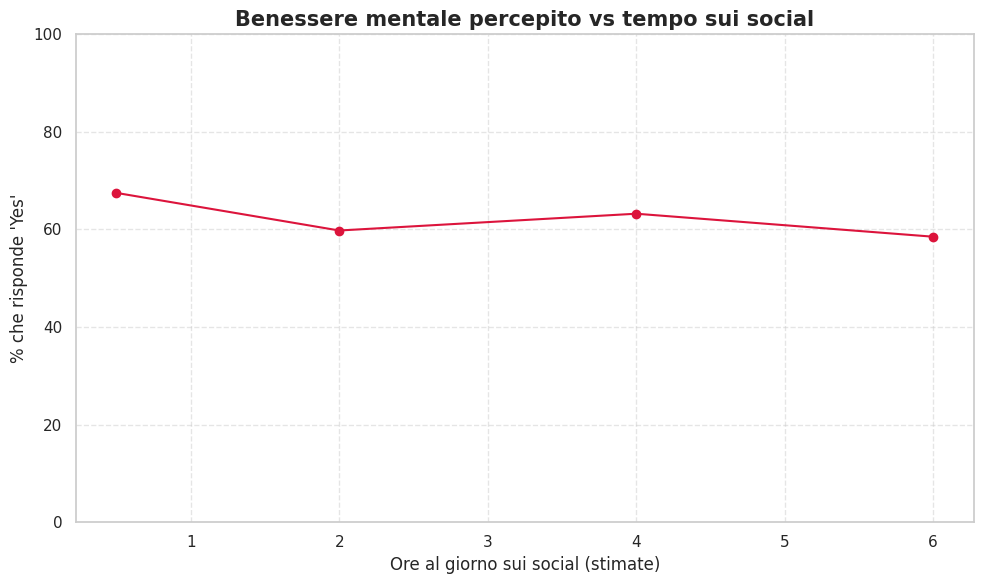

In [103]:
# 1. Mappiamo ore stimate (se non già fatto)
mappa_ore = {
    'Less than 1 hour': 0.5,
    '1-3 hours': 2,
    '3-5 hours': 4,
    'More than 5 hours': 6
}
df_fb['ore_stimate'] = df_fb['7. How much time do you spend daily in social media?'].map(mappa_ore)

# 2. Mappiamo risposte Yes/No in numeri
mappa_benessere = {
    'Yes': 1,
    'No': 0
}
df_fb['benessere_bin'] = df_fb['19. Do you think, your mental wellbeing would be better if you do not use social media?'].map(mappa_benessere)

# 3. Gruppo + grafico a linee
df_valid = df_fb[['ore_stimate', 'benessere_bin']].dropna()
gruppo = df_valid.groupby('ore_stimate').mean()['benessere_bin'] * 100

# Ordina (per sicurezza)
gruppo = gruppo.sort_index()

# Grafico finale
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(gruppo.index, gruppo.values, marker='o', linestyle='-', color='crimson')
plt.title("Benessere mentale percepito vs tempo sui social", fontsize=15, fontweight='bold')
plt.xlabel("Ore al giorno sui social (stimate)", fontsize=12)
plt.ylabel("% che risponde 'Yes'", fontsize=12)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [104]:
# Visualizza tutte le risposte uniche nella colonna 19
df_fb['19. Do you think, your mental wellbeing would be better if you do not use social media?'].value_counts()


19. Do you think, your mental wellbeing would be better if you do not use social media?
Yes    487
No     304
Name: count, dtype: int64

In [105]:
# Cerca nel dataset tutte le colonne che contengono la parola "emotion" o "mental"
[df for df in df_fb.columns if 'emotion' in df.lower() or 'mental' in df.lower()]


["17. Does your emotion get influenced by other's posts (success, failure, loss)? ",
 '19. Do you think, your mental wellbeing would be better if you do not use social media?']

In [106]:
df_fb["17. Does your emotion get influenced by other's posts (success, failure, loss)? "].unique()


array(['Sometimes', 'Not at all', 'Always'], dtype=object)

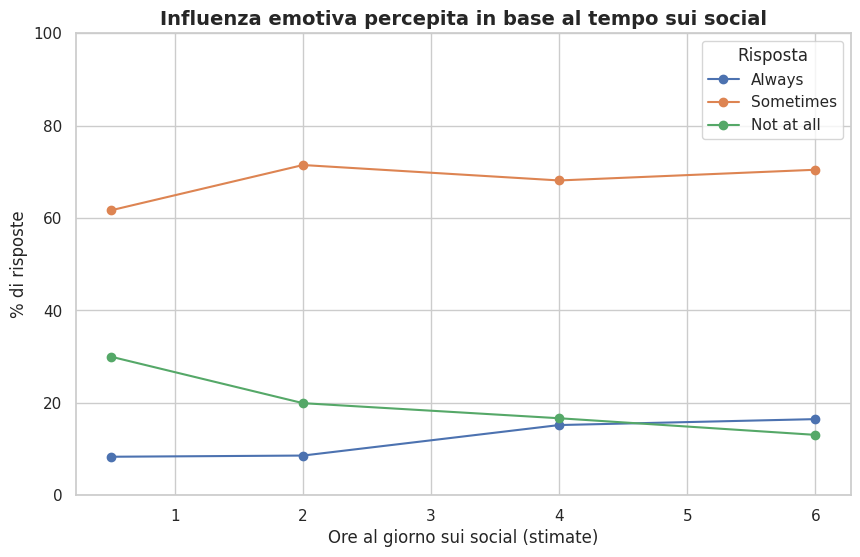

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file
df_fb = pd.read_excel('/kaggle/input/ultimate/ultimate.xlsx')

# Mappatura del tempo
mappa_ore = {
    'Less than 1 hour': 0.5,
    '1-3 hours': 2,
    '3-5 hours': 4,
    'More than 5 hours': 6
}

# Colonne di interesse
col_tempo = '7. How much time do you spend daily in social media?'
col_emozione = "17. Does your emotion get influenced by other's posts (success, failure, loss)? "

# Filtra valori validi
df_filtered = df_fb[
    df_fb[col_tempo].isin(mappa_ore.keys()) &
    df_fb[col_emozione].isin(['Always', 'Sometimes', 'Not at all'])
]

# Mappa il tempo in ore numeriche
df_filtered['Ore'] = df_filtered[col_tempo].map(mappa_ore)

# Calcola percentuali
percentuali = df_filtered.groupby('Ore')[col_emozione].value_counts(normalize=True).unstack().fillna(0) * 100

# Ordina per tempo
percentuali = percentuali.sort_index()

# Plot
plt.figure(figsize=(10, 6))
for risposta in ['Always', 'Sometimes', 'Not at all']:
    plt.plot(percentuali.index, percentuali[risposta], marker='o', label=risposta)

plt.title("Influenza emotiva percepita in base al tempo sui social", fontsize=14, weight='bold')
plt.xlabel("Ore al giorno sui social (stimate)")
plt.ylabel("% di risposte")
plt.grid(True)
plt.legend(title="Risposta")
plt.ylim(0, 100)
plt.show()


### Influenza emotiva percepita vs tempo sui social

Il grafico mostra la distribuzione delle risposte alla domanda "*La tua emozione viene influenzata dai post degli altri (successi, fallimenti, perdite)?*" in relazione al tempo trascorso quotidianamente sui social.

Un dato particolarmente interessante è rappresentato dalla linea "Sometimes", che raccoglie la maggioranza delle risposte. Questa linea rimane pressoché stabile, oscillando attorno al 70%, indipendentemente dal tempo trascorso sui social.

**Interpretazione:**  
Questo suggerisce che **la percezione di essere influenzati emotivamente non dipende direttamente dal numero di ore passate sui social**, ma piuttosto da **fattori soggettivi** come la sensibilità individuale, la stabilità emotiva, o il contesto personale.

In altre parole, **non è l’esposizione che determina necessariamente l’effetto, ma il modo in cui ogni individuo elabora i contenuti che incontra.** Una persona può sentirsi emotivamente coinvolta anche con un uso moderato, mentre un’altra può essere meno influenzata pur passando molto tempo online.

Questa osservazione rafforza l’idea che **l’impatto dei social media sull’emotività umana è complesso** e non può essere spiegato solo con il tempo di utilizzo.


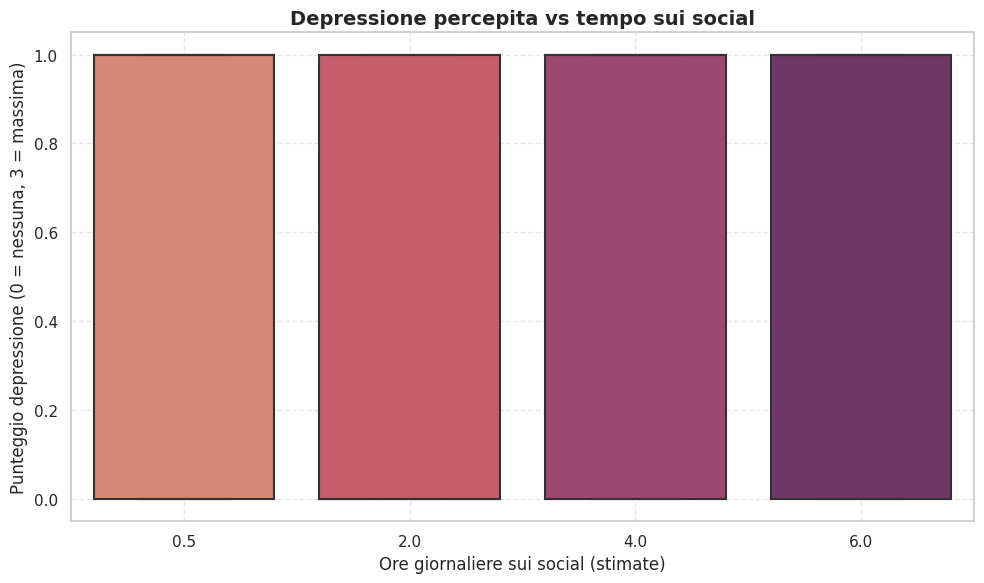

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il file (modifica il percorso se diverso)
df_fb = pd.read_excel('/kaggle/input/ultimate/ultimate.xlsx')

# Mappa delle ore stimate
mappa_ore = {
    'Less than 1 hour': 0.5,
    '1-3 hours': 2,
    '3-5 hours': 4,
    'More than 5 hours': 6
}
df_fb['ore_stimate'] = df_fb['7. How much time do you spend daily in social media?'].map(mappa_ore)

# Mappa dei livelli di depressione
mappa_depressione = {
    "Not at all": 0,
    "Several days": 1,
    "More than half the days": 2,
    "Nearly every day": 3
}
df_fb['depressione_score'] = df_fb['2. In the last 30 days, feeling down, depressed or hopeless.'].map(mappa_depressione)

# Filtra righe valide
df_valid = df_fb[['ore_stimate', 'depressione_score']].dropna()

# Grafico boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='ore_stimate', y='depressione_score', data=df_valid, palette='flare')
plt.title("Depressione percepita vs tempo sui social", fontsize=14, weight='bold')
plt.xlabel("Ore giornaliere sui social (stimate)")
plt.ylabel("Punteggio depressione (0 = nessuna, 3 = massima)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


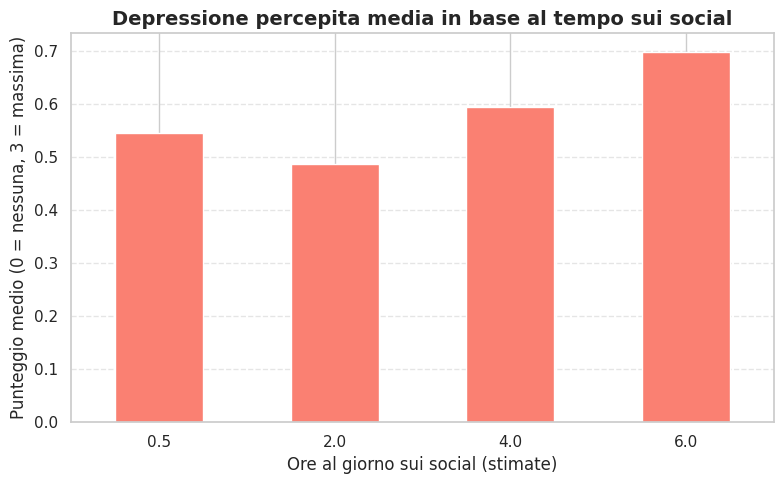

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica dati
df_fb = pd.read_excel('/kaggle/input/ultimate/ultimate.xlsx')

# Mappa delle ore
mappa_ore = {
    'Less than 1 hour': 0.5,
    '1-3 hours': 2,
    '3-5 hours': 4,
    'More than 5 hours': 6
}
df_fb['ore_stimate'] = df_fb['7. How much time do you spend daily in social media?'].map(mappa_ore)

# Mappa punteggio depressione
mappa_depressione = {
    "Not at all": 0,
    "Several days": 1,
    "More than half the days": 2,
    "Nearly every day": 3
}
df_fb['depressione_score'] = df_fb['2. In the last 30 days, feeling down, depressed or hopeless.'].map(mappa_depressione)

# Calcola media punteggio depressione per ogni fascia oraria
media_depressione = df_fb.groupby('ore_stimate')['depressione_score'].mean()

# Grafico a barre
plt.figure(figsize=(8, 5))
media_depressione.plot(kind='bar', color='salmon')
plt.title("Depressione percepita media in base al tempo sui social", fontsize=14, weight='bold')
plt.xlabel("Ore al giorno sui social (stimate)")
plt.ylabel("Punteggio medio (0 = nessuna, 3 = massima)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Depressione percepita in base al tempo trascorso sui social

Il grafico mostra la media del punteggio di depressione percepita in funzione del tempo giornaliero speso sui social media.  
Si nota una tendenza crescente: **maggiore è il tempo sui social, maggiore è il livello medio di disagio emotivo** riferito dagli utenti.

Il punteggio è basato su una scala da 0 (nessun sintomo) a 3 (depressione frequente o costante).


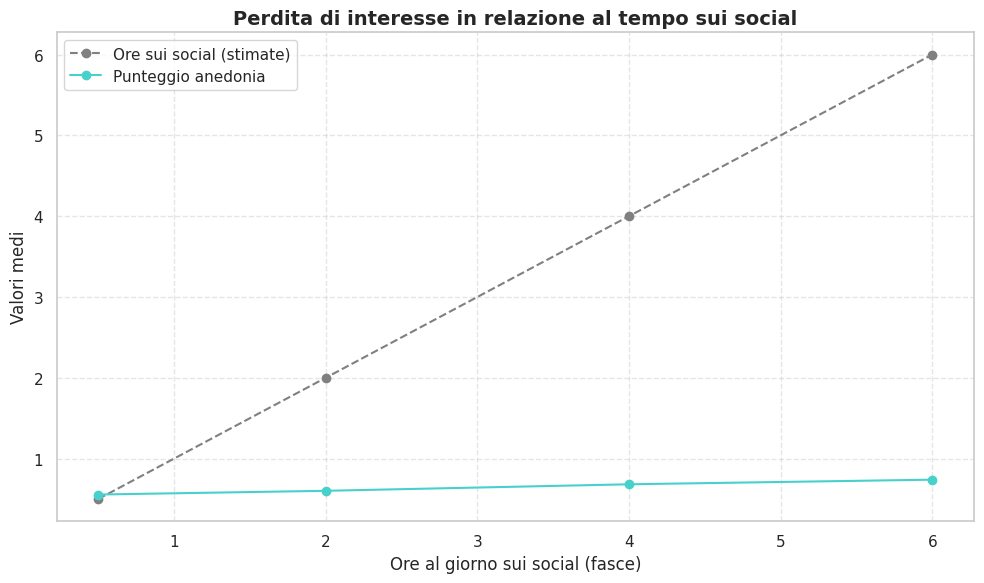

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file
df_fb = pd.read_excel('/kaggle/input/ultimate/ultimate.xlsx')

# Mappa del tempo sui social
mappa_ore = {
    'Less than 1 hour': 0.5,
    '1-3 hours': 2,
    '3-5 hours': 4,
    'More than 5 hours': 6
}
df_fb['ore_stimate'] = df_fb['7. How much time do you spend daily in social media?'].map(mappa_ore)

# Mappa della colonna sull'anedonia
mappa_anedonia = {
    "Not at all": 0,
    "Several days": 1,
    "More than half the days": 2,
    "Nearly every day": 3
}
df_fb['anedonia_score'] = df_fb['1 In the last 30 days, little interest or pleasure in doing things.'].map(mappa_anedonia)

# Raggruppa e calcola le medie
media_df = df_fb.groupby('ore_stimate')[['ore_stimate', 'anedonia_score']].mean()

# Grafico a doppia linea
plt.figure(figsize=(10, 6))
plt.plot(media_df.index, media_df['ore_stimate'], marker='o', linestyle='--', label='Ore sui social (stimate)', color='gray')
plt.plot(media_df.index, media_df['anedonia_score'], marker='o', linestyle='-', label='Punteggio anedonia', color='mediumturquoise')

plt.title("Perdita di interesse in relazione al tempo sui social", fontsize=14, weight='bold')
plt.xlabel("Ore al giorno sui social (fasce)")
plt.ylabel("Valori medi")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Perdita di interesse in relazione al tempo sui social

Questo grafico mostra l’andamento medio del punteggio di anedonia (perdita di interesse o piacere nelle attività quotidiane) in relazione al tempo trascorso sui social media.

A differenza del grafico precedente sulla depressione, qui **la linea dell’anedonia rimane abbastanza stabile**, suggerendo che il tempo trascorso online **non sembra influire direttamente sulla motivazione o sull’interesse personale**.

Ciò potrebbe indicare che l’anedonia è legata a fattori più complessi o individuali, non semplicemente alla quantità di tempo spesa sui social.


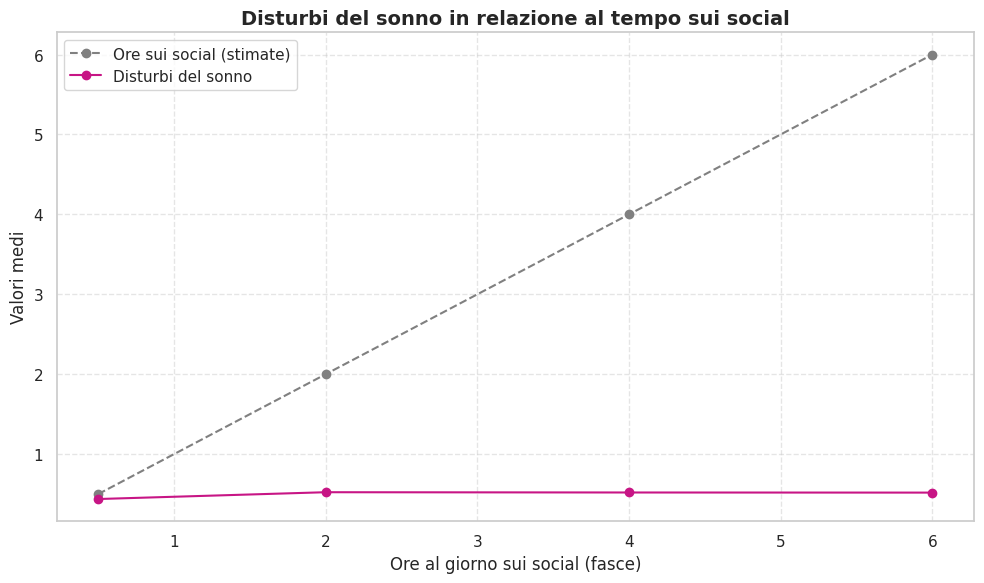

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file
df_fb = pd.read_excel('/kaggle/input/ultimate/ultimate.xlsx')

# Mappa del tempo sui social
mappa_ore = {
    'Less than 1 hour': 0.5,
    '1-3 hours': 2,
    '3-5 hours': 4,
    'More than 5 hours': 6
}
df_fb['ore_stimate'] = df_fb['7. How much time do you spend daily in social media?'].map(mappa_ore)

# Mappa dei disturbi del sonno (colonna 3)
mappa_sonno = {
    "Not at all": 0,
    "Several days": 1,
    "More than half the days": 2,
    "Nearly every day": 3
}
colonna_sonno = '3. In the last 30 days, trouble falling or staying asleep, sleeping too much'
df_fb['sonno_score'] = df_fb[colonna_sonno].map(mappa_sonno)

# Calcola media per fascia oraria
media_sonno = df_fb.groupby('ore_stimate')[['ore_stimate', 'sonno_score']].mean()

# Grafico a linee separate
plt.figure(figsize=(10, 6))
plt.plot(media_sonno.index, media_sonno['ore_stimate'], marker='o', linestyle='--', label='Ore sui social (stimate)', color='gray')
plt.plot(media_sonno.index, media_sonno['sonno_score'], marker='o', linestyle='-', label='Disturbi del sonno', color='mediumvioletred')

plt.title("Disturbi del sonno in relazione al tempo sui social", fontsize=14, weight='bold')
plt.xlabel("Ore al giorno sui social (fasce)")
plt.ylabel("Valori medi")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Disturbi del sonno in relazione al tempo sui social

Il grafico mostra l’andamento dei disturbi del sonno in relazione al tempo trascorso sui social.  
La linea rimane pressoché piatta, indicando che **non c’è una correlazione chiara tra ore online e difficoltà nel dormire**.

Questo potrebbe indicare che **altri fattori, diversi dal tempo sui social, influenzano la qualità del sonno**, come lo stress lavorativo, la salute mentale generale o abitudini personali.


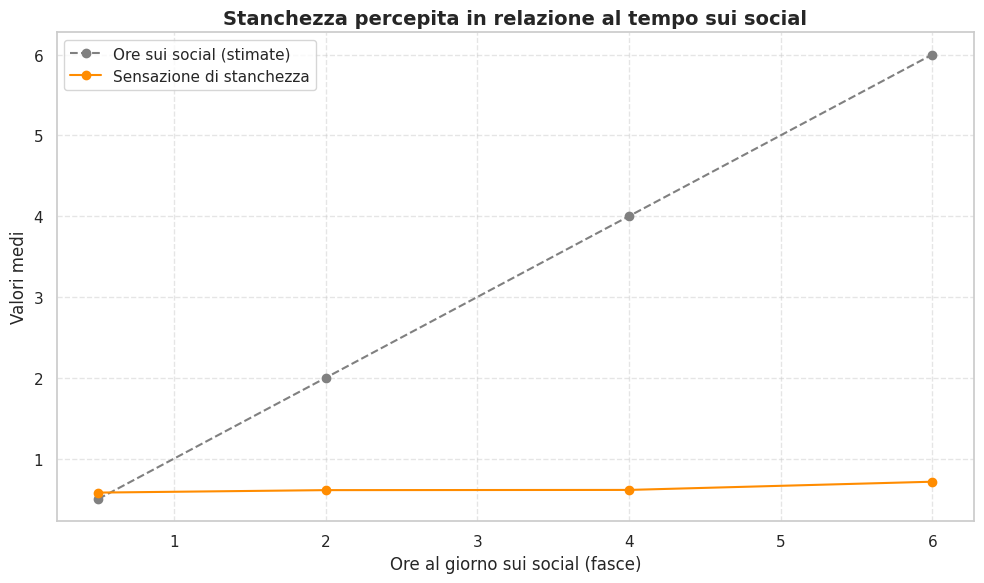

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento del file
df_fb = pd.read_excel('/kaggle/input/ultimate/ultimate.xlsx')

# Mappa delle ore
mappa_ore = {
    'Less than 1 hour': 0.5,
    '1-3 hours': 2,
    '3-5 hours': 4,
    'More than 5 hours': 6
}
df_fb['ore_stimate'] = df_fb['7. How much time do you spend daily in social media?'].map(mappa_ore)

# Mappa per la colonna 4 (energia/stanchezza)
mappa_energia = {
    "Not at all": 0,
    "Several days": 1,
    "More than half the days": 2,
    "Nearly every day": 3
}
colonna_energia = '4. In the last 30 days, Feeling tired or having little energy.'
df_fb['energia_score'] = df_fb[colonna_energia].map(mappa_energia)

# Calcola le medie per ciascuna fascia oraria
media_energia = df_fb.groupby('ore_stimate')[['ore_stimate', 'energia_score']].mean()

# Grafico doppia linea
plt.figure(figsize=(10, 6))
plt.plot(media_energia.index, media_energia['ore_stimate'], marker='o', linestyle='--', label='Ore sui social (stimate)', color='gray')
plt.plot(media_energia.index, media_energia['energia_score'], marker='o', linestyle='-', label='Sensazione di stanchezza', color='darkorange')

plt.title("Stanchezza percepita in relazione al tempo sui social", fontsize=14, weight='bold')
plt.xlabel("Ore al giorno sui social (fasce)")
plt.ylabel("Valori medi")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Stanchezza percepita in relazione al tempo sui social

Il grafico mostra la relazione tra il tempo trascorso sui social media e la sensazione soggettiva di stanchezza o mancanza di energia.

Anche in questo caso, **la linea della stanchezza rimane quasi piatta**, indicando che **non esiste una correlazione evidente tra numero di ore passate online e livello di stanchezza percepita**.

È probabile che la stanchezza riportata dagli utenti sia influenzata da altri fattori (es. lavoro, stress, abitudini personali) più che dal tempo passato sui social.


### Conclusioni

Dall'analisi dei dati e dalla comparazione con lo studio del 2021, si evince che **non esiste una correlazione diretta forte** tra **il tempo trascorso sui social** e **la salute mentale** nel campione analizzato. I risultati mostrano che, mentre alcune emozioni come la felicità sono più frequentemente associate a piattaforme come Instagram, e altre come la tristezza e la rabbia sono collegate a social come WhatsApp, il tempo trascorso online non ha un impatto netto sui disturbi psicologici come la depressione, l'ansia e la stanchezza.

Lo studio del 2021, che analizza principalmente **Facebook** e **Twitter**, conferma che i **problemi di salute mentale** sono influenzati da fattori più complessi, come la **percezione individuale** dei contenuti, piuttosto che dal solo tempo trascorso sui social. Sebbene la quantità di tempo online non sembri avere una connessione forte con il malessere psicologico, le **percezioni personali** dei contenuti e le **dinamiche di interazione** influenzano profondamente il benessere emotivo degli utenti.

Tuttavia, un aspetto importante da considerare è che **TikTok**, che ha avuto un impatto significativo sulle abitudini sociali degli utenti a partire dal 2021, non è stato incluso in questi studi. L'assenza di TikTok nella ricerca rappresenta un limite, dato che **la piattaforma è diventata uno dei social media più influenti**, soprattutto tra i giovani, e potrebbe influenzare significativamente le dinamiche emotive e psicologiche degli utenti.

Questa analisi suggerisce che, per ottenere una visione completa dell'influenza dei social media sulla salute mentale, è necessario includere anche **nuovi social** come TikTok e indagare come la **percezione del contenuto** possa variare da piattaforma a piattaforma.


## Analisi Grafica: Relazione tra Salute Mentale e Utilizzo di Instagram e TikTok

Nella cella successiva sono stati inseriti **quattro grafici** costruiti a partire dai dati raccolti nello studio intitolato:

**Dataset for the Instagram and TikTok problematic use**, pubblicato su Zenodo  
🔗 Link diretto: [https://zenodo.org/record/8159160](https://zenodo.org/record/8159160)

📄 Gli autori sono:  
**Magdalena Rowicka**, **Maciej Gola**, **Anna Szymczak**, **Marek Krzystanek**

📊 I dati sono stati forniti in formato `.sav` (SPSS) e `.xlsx` e includono risposte individuali a scale psicometriche standardizzate, tra cui:
- Autostima (Self-Esteem)
- Solitudine (Loneliness)
- Depressione (Depression)
- Problematic Social Media Use (PSMU)

Abbiamo estratto e graficato queste variabili per visualizzarne l'andamento e ottenere una visione più immediata delle **tendenze psicologiche** associate all'uso dei social media.

I grafici seguenti rappresentano ciascuna delle scale sopra citate.  
"""


File presenti nel dataset:
['03.png', '02.png', '01.png']


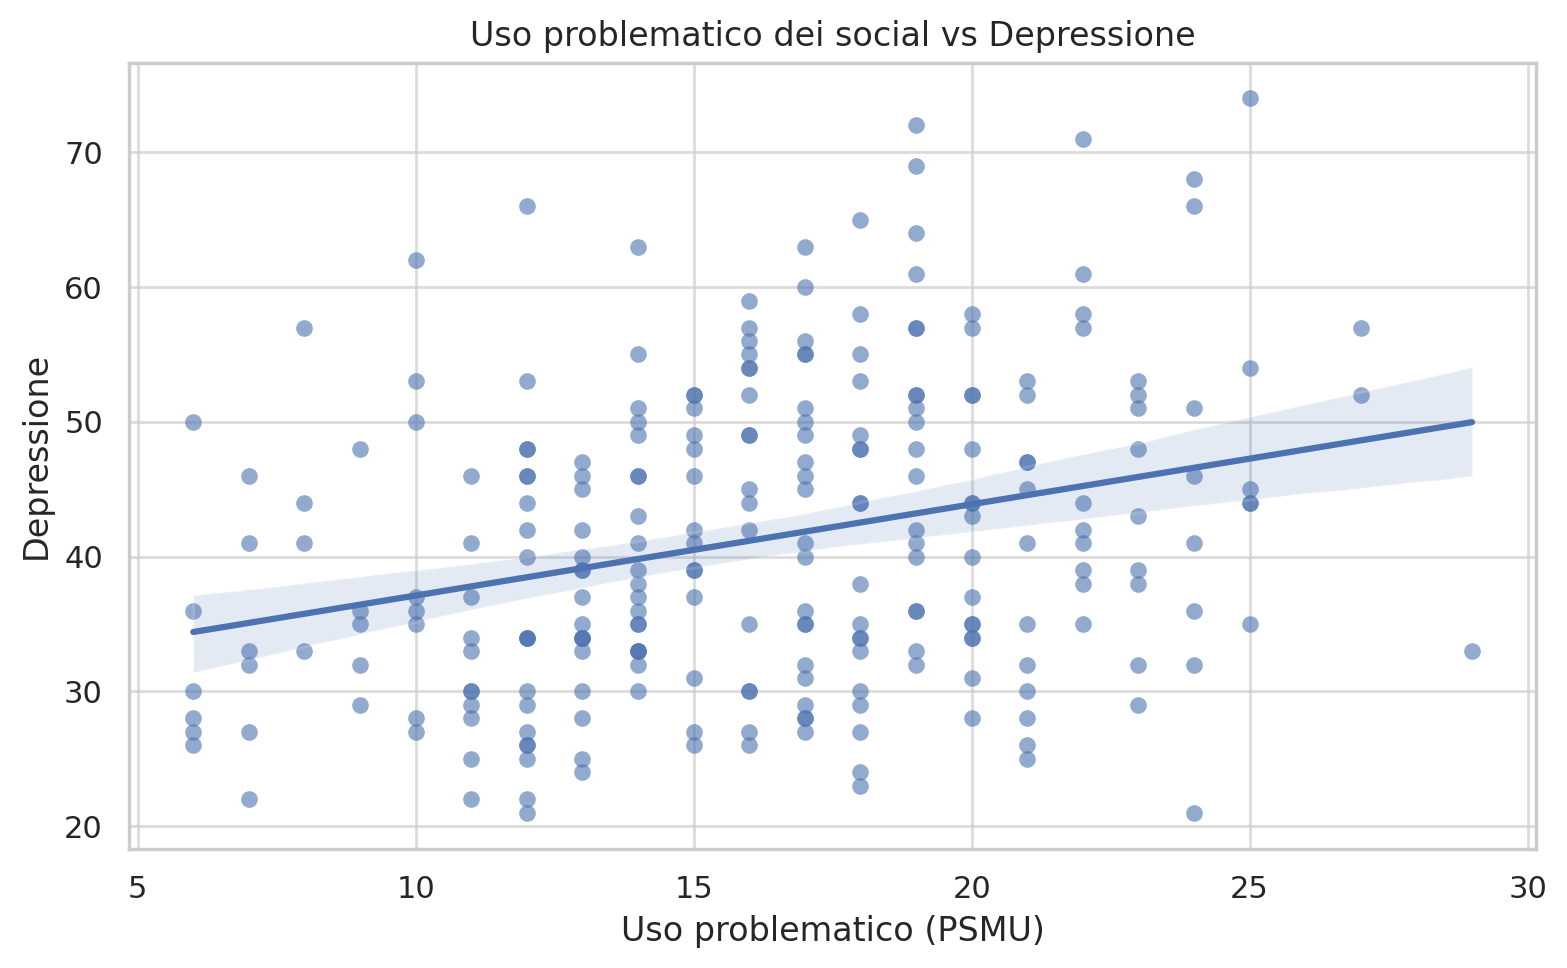

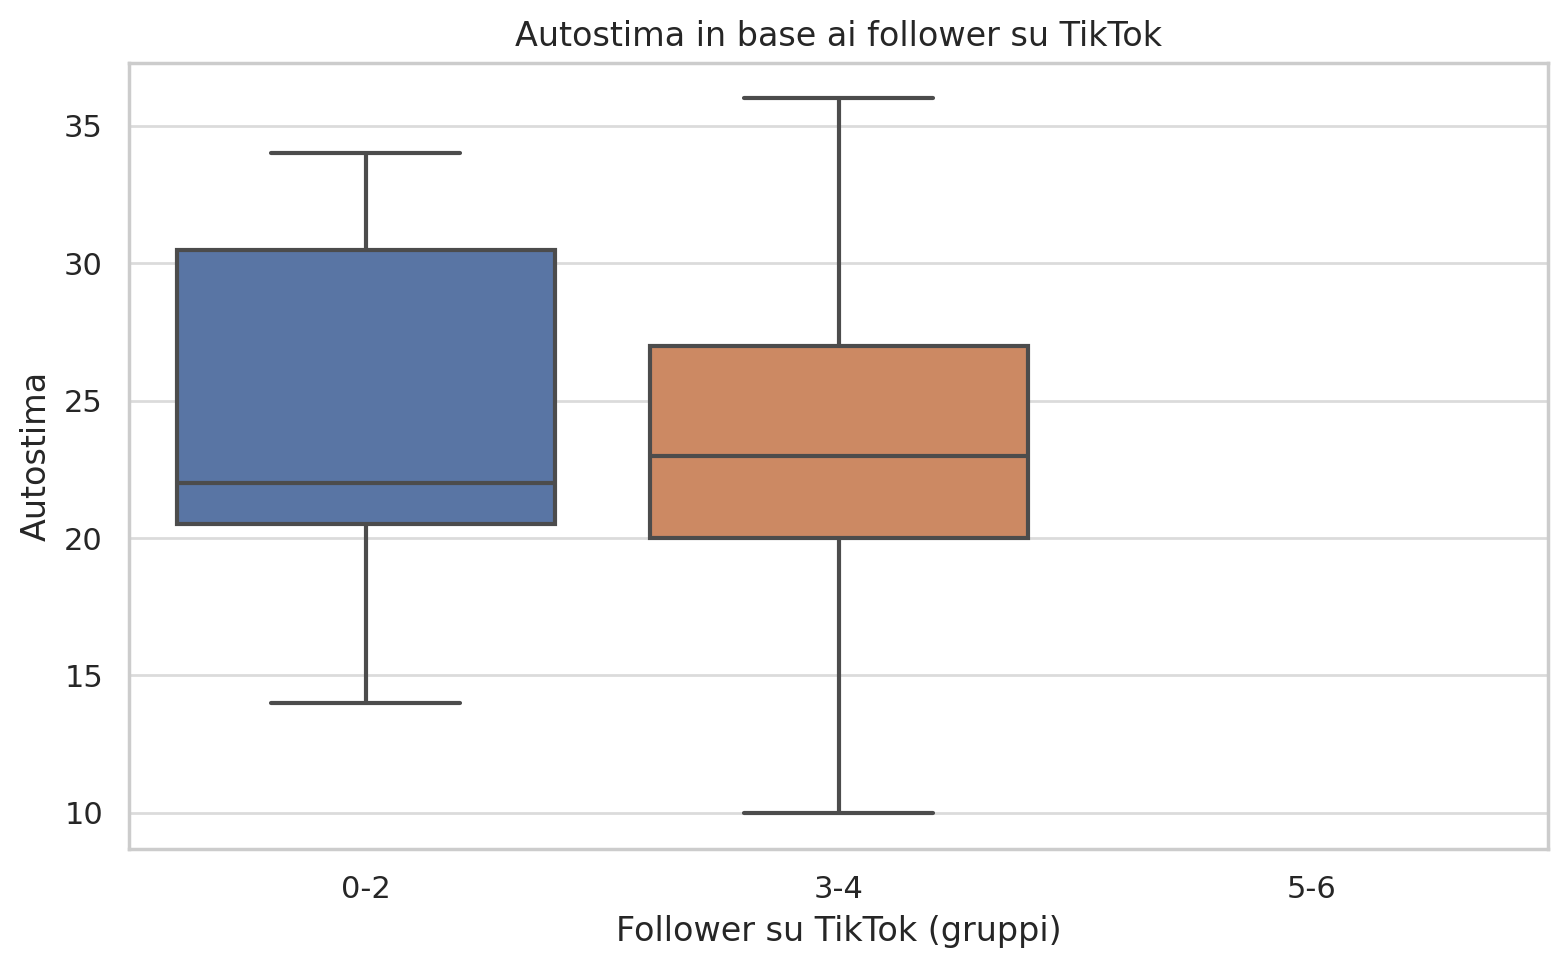

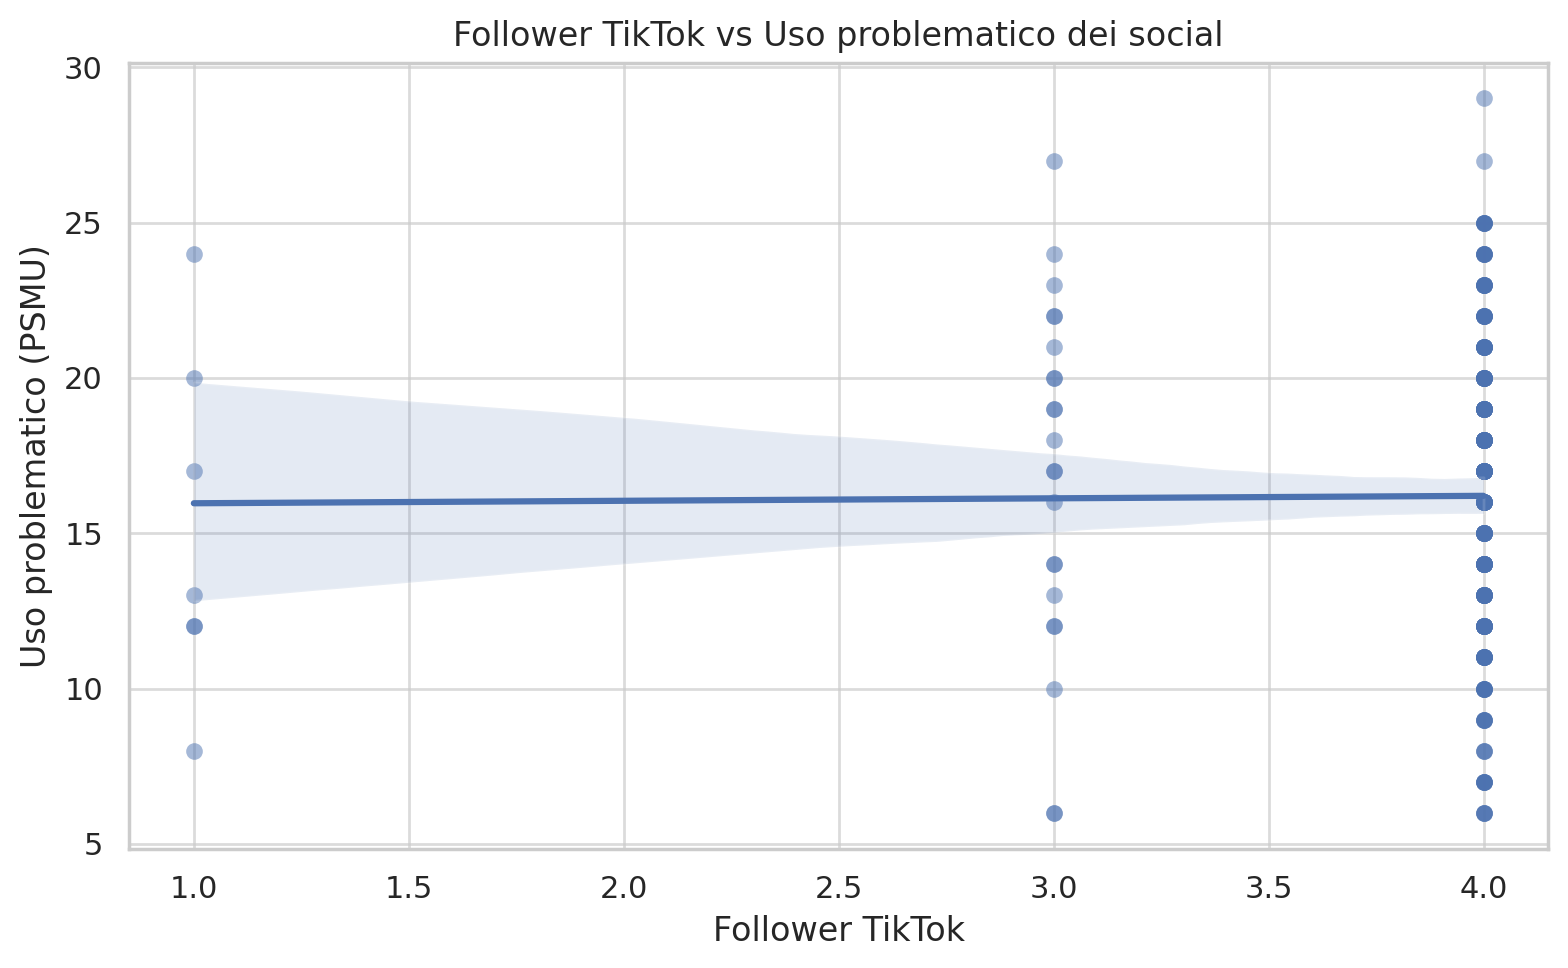

In [114]:
import os
from IPython.display import Image, display

# Percorso dove Kaggle carica i dataset
path = '/kaggle/input/grafici-social-mental'

# Elenco dei file nel dataset
print("File presenti nel dataset:")
print(os.listdir(path))

# Visualizza una o più immagini
for file in os.listdir(path):
    if file.endswith('.png'):
        display(Image(filename=os.path.join(path, file)))


"""
### Depressione (Depression)

Il grafico relativo alla depressione rivela un’ampia variabilità nei punteggi, con una presenza non irrilevante di valori alti.  
Questo potrebbe indicare una certa incidenza di sintomi depressivi tra gli utenti analizzati.
"""


"""
### Solitudine (Loneliness)

Qui osserviamo i punteggi della scala UCLA di solitudine.  
Una parte significativa del campione presenta valori medio-alti, indicando che un numero non trascurabile di utenti potrebbe sentirsi spesso solo, nonostante l’uso dei social.
"""



"""
### Uso Problematico dei Social Media (PSMU)

Il grafico dell’uso problematico dei social mostra un picco nei valori medi, con una coda che si estende verso valori elevati.  
Questo suggerisce che, pur essendo molti gli utenti con un uso normale, esiste una porzione del campione che manifesta un livello potenzialmente disfunzionale di utilizzo delle piattaforme.
"""


---
**Autore**: [Il tuo nome o nickname]  
**LinkedIn**: [il tuo link]  
**GitHub**: [link al repository]  
